![example](images/House-Sales.jpeg)

# Property sales analysis in King County

**Author:** Ngoc Ho
***

## Overview
This project aims to build a multiple linear regression model to predict house prices. This regression model can be utilized to give accurate property appraisal to homeowners and home buyers, potentially assist in property investment decisions to maximise profit. The model will be derived from King County in King County, Seattle, WA house sale dataset. The data will be explored for sigificant features and the model will be built using OLS from statsmodel library in Python. The model shows very promising accuracy in predicting property value however it has low inference value to property value. Perhaps a different model would have been more suitable for our dataset. 

## Business Problem

A Seattle realestate company wants to establish an evaluation system for houses to provide a price appraisal and investment strategies to their clients. Having an accurate house price predictor will help the company build their reputation by gaining invaluable trust from their clients. For the client, this will help maximise their selling/investing potentials and for the company this will help increase their client number and increase commission. 

The main data analysis questions we will be focusing on are:
1. What features add value to properties?
2. Does renovation add to property value?
3. Does neighbourhood add values to property?


## Data Understanding

This project uses the King County House Sales dataset (kc_house_data.csv ). This dataset has 21 columns and 21597 entries of house sales in King County, Seattle, WA between 2014 and 2015. The dataset contains information on sold date, price, year built, year renovated and structure features within the property such as living area, number of bedrooms, bathrooms, floors, waterfront. It also has information on location, surrounding 15 houses's area int the neibourhood. We will examine the relationship of these features and property value using correlation analysis. These features will also be used to investigate their effect on property price and be selected to be included in a multilinear regression model to predict property value.  

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn import metrics
import pickle

%matplotlib inline

**Data Exploration**

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Data Preparation
- Price is our dependent variable and the rest of the columns except ID are our independent variables or features. 
- There are 2376 null values in waterfront, 63 in views and 3842 in yr_renovated. As majority of entries were 0, we will replace null value as 0 in these columns 
- All variable were converted to numerical values so that they can be used in our regression model. 
- All outliers will also removed as they will affect our regression model. 
- Features are selected for regression model using stepwise selection and also based on their linear correlation coefficiency with price. Columns are dropped if they're deemed insignificant based on these selection process to eliminate multicollinearity and improve our model accuracy. 

**Checking for duplicates**

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Columns with null values: waterfront, view and yr_renovated.
They need to be dealt with before regression analysis because regression will not work with null values. We will also convert all categorical values to numeric values to allow regression model to work.
Since most of values in these columns are 0, we will replace all nulls to 'No'**

In [8]:
#waterfront 
df.waterfront.unique()

array([nan,  0.,  1.])

In [9]:
df.waterfront.fillna(0,inplace=True)
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [10]:
#view
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [11]:
df.view.fillna(0,inplace=True)
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
#yr_renovated
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [13]:
#replacing all year number to 1 for it has been renovated
year= [ 1991., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.]
df.yr_renovated.replace([year], 1, inplace=True)

In [14]:
#replacing all nulls to 0
df.yr_renovated.fillna(0,inplace=True)
df.yr_renovated.value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

In [15]:
#date
#separating date sold in separate columns with numerical values
df['date_clean'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date_clean'].map(lambda x: x.day)
df['month_sold'] = df['date_clean'].map(lambda x: x.month)
df['year_sold'] = df['date_clean'].map(lambda x: x.year)

In [16]:
#sqft_basement
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [17]:
#replacing ? value to 0 and convert data type to float
df['sqft_basement'] = df["sqft_basement"].replace({"?": "0"})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [18]:
#Dropping date and 'date_clean' columns as we don't need them anymore 
df.drop(['date', 'date_clean'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Data Modeling

**Baseline model**
- All features were included in the model. Adjusted R2 value and residual mean square errors (RMSE) are noted as baseline for comparison. 

**Model 1**

- Only significant features are selected for the model based on stepwise selection. These features must have reasonable linear correlation coefficience with dependent variable price and are roughly normally distributed.
- There were 5 features that are: sqft_living, bathrooms, grade, sqft_above and sqft_living15.
- All outliers are removed from features before modelling.
- The model is evaluated. Adjusted R2, RMSE and Jacque Bera value are analysis to assess multicollinearity and effects of outliers. 

**Model 2**

- In this model, multicollinearity is removed by removing sqft_above. 

**Model 3**

- In this model, both features and dependent variable undergo normalisation process using log transformation to make continuous features more noramlly distributed. 
- Linear regression operates under various assumptions including that the dependent variable can be decomposed into a linear combination of the independent features. Additionally, data should be homoscedastic and the residuals should follow a normal distribution.
- Having the data more normally distributed will benefit your model and model performance in general. So while normality of the predictors is not a mandatory assumption, having (approximately) normal features may be helpful for the model. 

**Final Model**

- In this model, all continous features undergo feature scalling using standardisation making all features on the same scale of having mean of 0 and standard deviation of 1. Our dataset contains features that vary largely in magnitudes. If these magnitudes unchanged, coefficient sizes will fluctuate largely in magnitude as well. This can give the false impression that some variables are less important than others. 
 
At each iteration of the model, evaluation process of the model were done using residual plots for the error term for variance and heteroscedasticity, QQ plot to check normality assumptions. Adjusted R2 and RMSE value also compared to track the tranformation of the model. 

Now that we have all our variable in numerical values, let's check each independent's distribution, their linearity and correlation with price so we can narrow down the significant variables. 

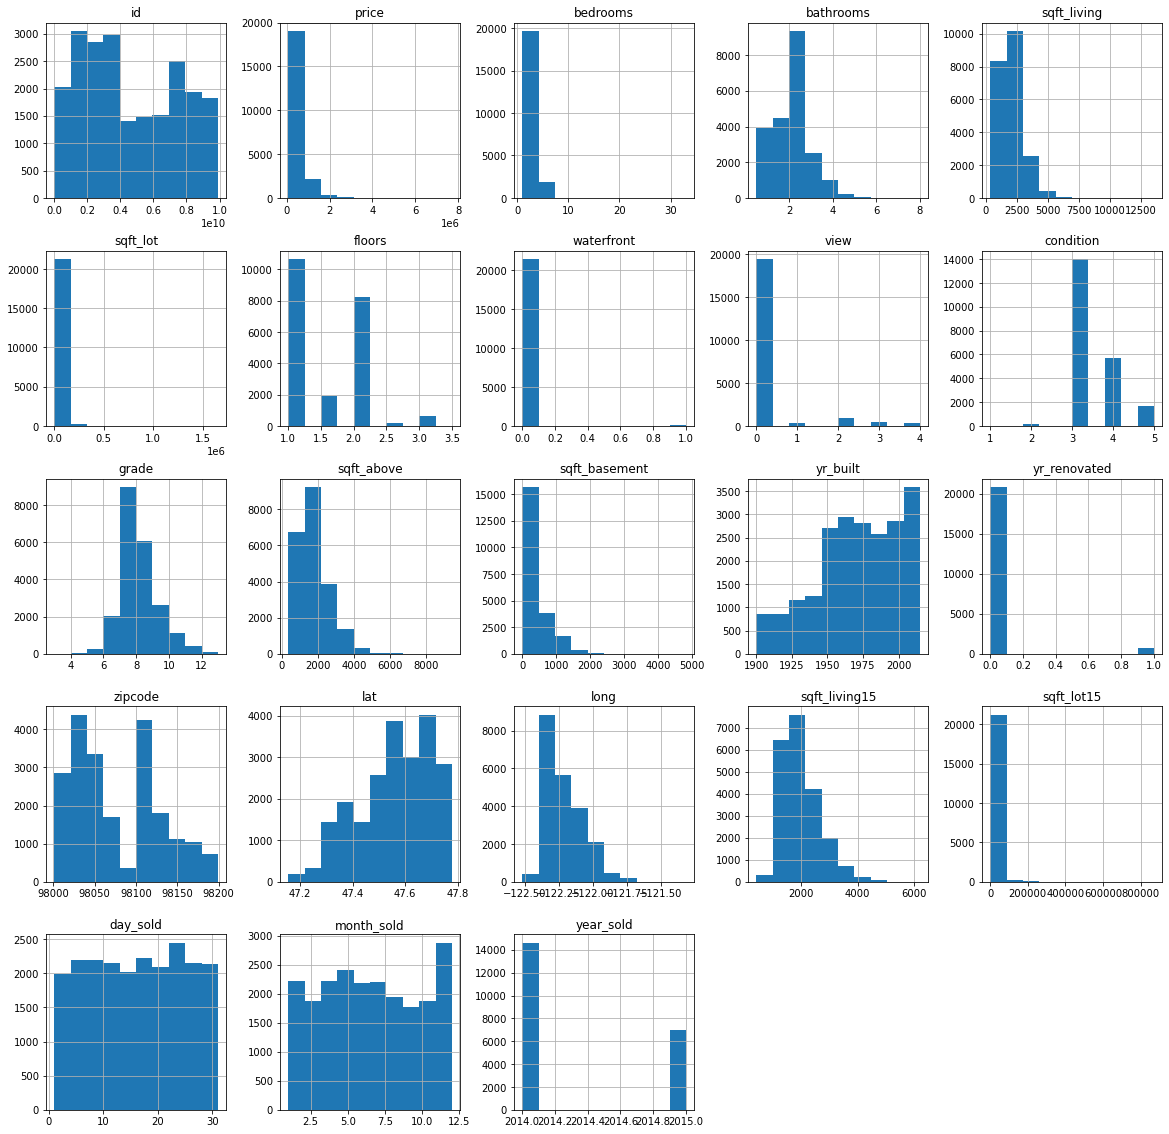

In [19]:
#distributions using histogram
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

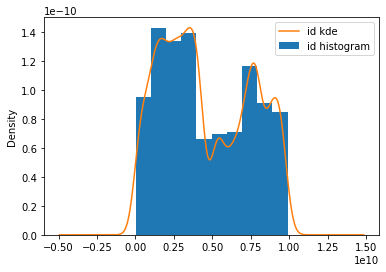

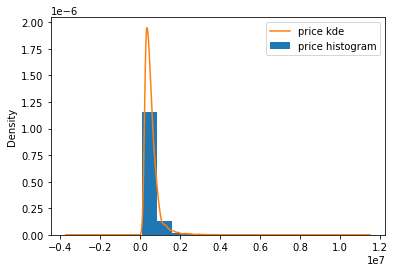

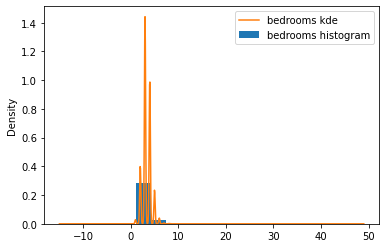

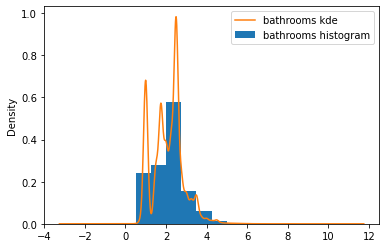

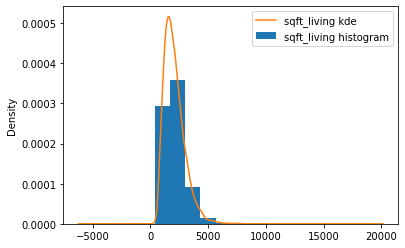

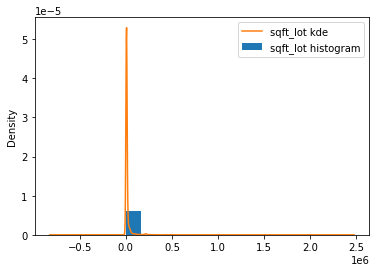

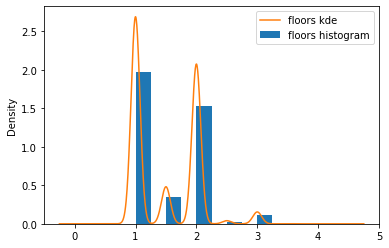

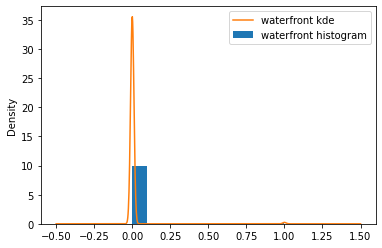

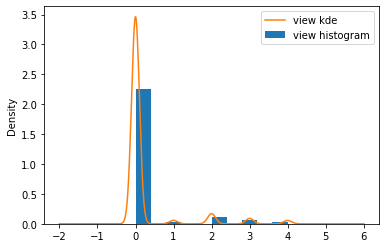

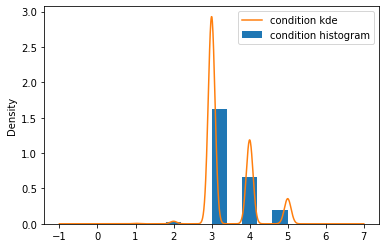

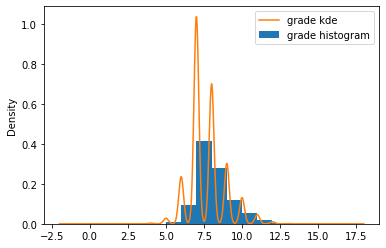

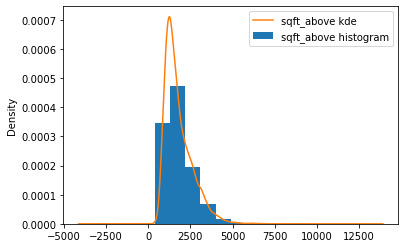

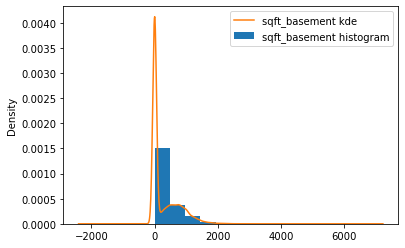

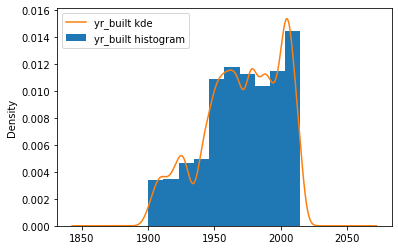

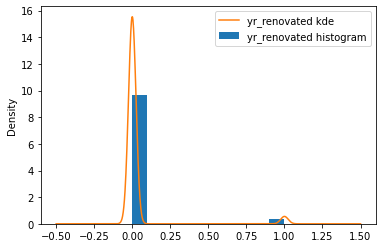

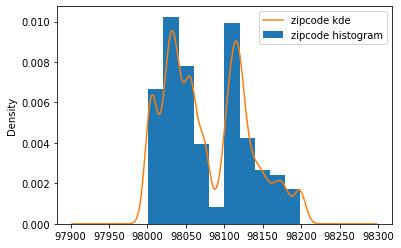

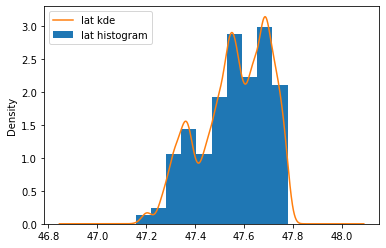

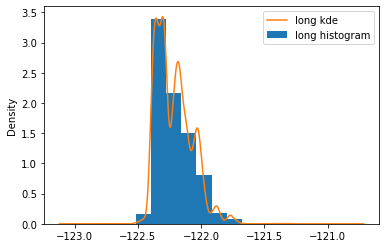

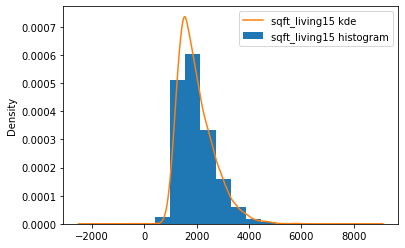

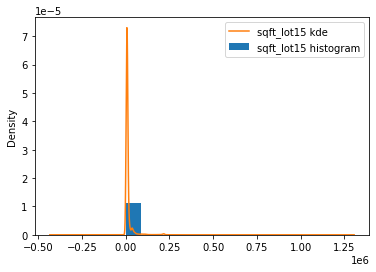

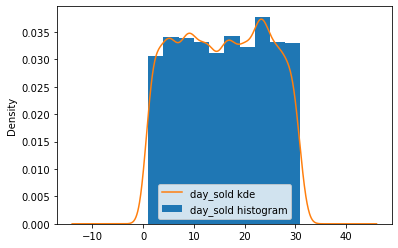

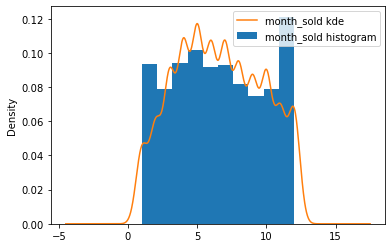

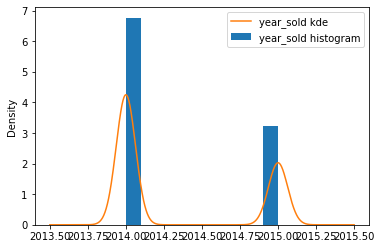

In [20]:
#KDE plots
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

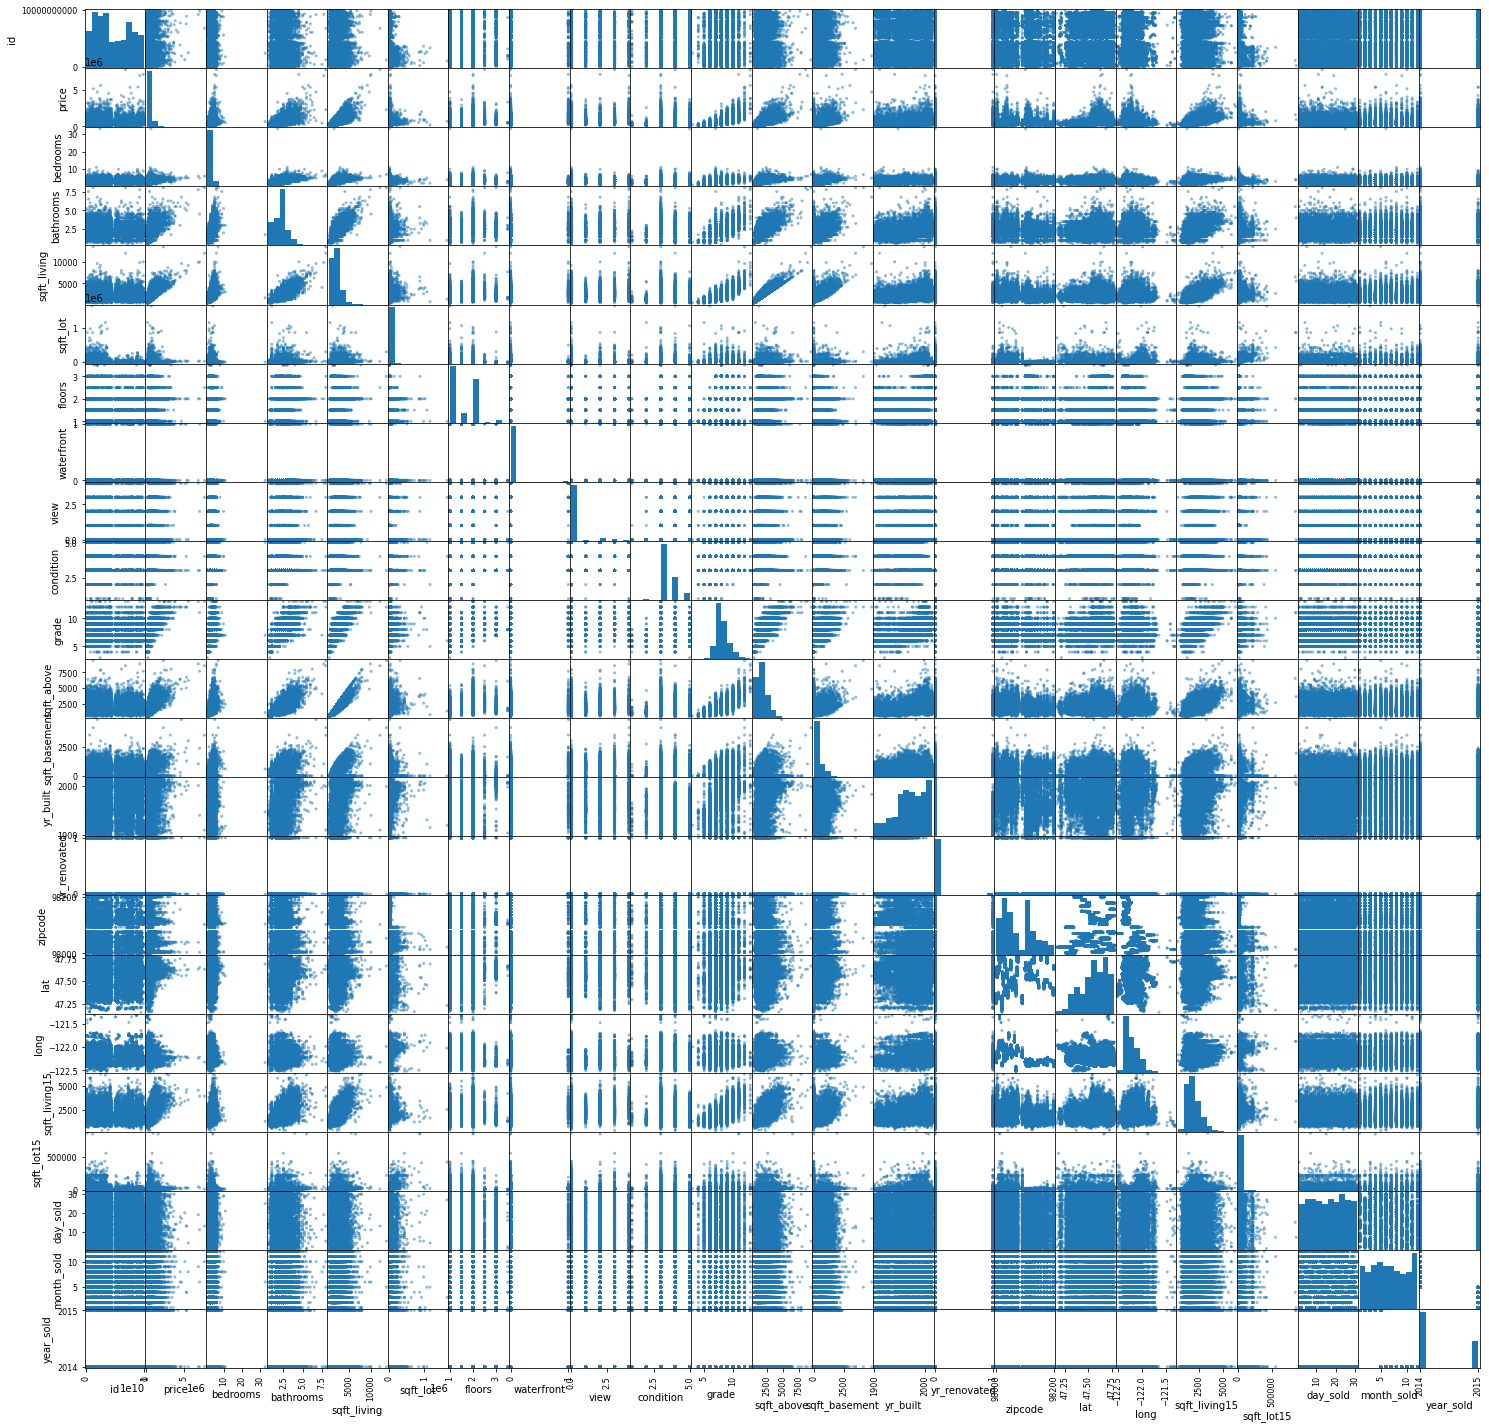

<Figure size 432x288 with 0 Axes>

In [21]:
#scatter plot
pd.plotting.scatter_matrix(df,figsize  = [25, 25]);
plt.show()
plt.tight_layout()

From histogram and KDE plots, it seems that most continuous variable are somewhat normally distributed.

**Baseline Model**

Let's build a baseline model with all independent variables included to filter out significant features and also to have a baseline for comparisons of later models. 

In [21]:
#Baseline model
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2308.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:25:14   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21574   BIC:                         5.889e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.679e+07   9.97e+06     -6.699      0.000   -8.63e+07   -4.72e+07
id            -1.349e-06   4.81e-07     -2.802      0.005   -2.29e-06   -4.05e-07
bedrooms      -3.611e+04   1895.492    -19.051      0.000   -3.98e+04   -3.24e+04
bathrooms      4.188e+04   3253.716     12.871      0.000    3.55e+04    4.83e+04
sqft_living     103.7713     18.027      5.756      0.000      68.437     139.105
sqft_lot          0.1176      0.048      2.457      0.014       0.024       0.211
floors         7650.4990   3591.439      2.130      0.033     611.013    1.47e+04
waterfront     6.188e+05   1.81e+04     34.211      0.000    5.83e+05    6.54e+05
view           5.317e+04   2117.373     25.109      0.000     4.9e+04    5.73e+04
condition      2.804e+04   2344.312     11.959      0.000    2.34e+04    3.26e+04
grade          9.727e+04   2155.487     45.126      0.000     9.3e+04    1.01e+05
sqft_above       77.0543     18.018      4.276      0.000      41.737     112.372
sqft_basement    46.9031     17.858      2.626      0.009      11.900      81.907
yr_built      -2641.1743     71.733    -36.820      0.000   -2781.775   -2500.573
yr_renovated   4.836e+04   7919.305      6.107      0.000    3.28e+04    6.39e+04
zipcode        -584.8477     32.902    -17.776      0.000    -649.338    -520.358
lat            6.026e+05   1.07e+04     56.257      0.000    5.82e+05    6.24e+05
long          -2.155e+05   1.31e+04    -16.403      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.5336      3.441      6.258      0.000      14.789      28.279
sqft_lot15       -0.4006      0.073     -5.463      0.000      -0.544      -0.257
day_sold       -360.8515    159.165     -2.267      0.023    -672.827     -48.876
month_sold     1129.2739    708.781      1.593      0.111    -259.988    2518.536
year_sold      3.656e+04   4721.714      7.744      0.000    2.73e+04    4.58e+04
==============================================================================
Omnibus:                    18404.912   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1877255.867
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.111   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
X_0 = df.drop('price', axis=1)
y_0 = df['price']
X0_train, X0_test, y0_train, y0_test = train_test_split(X_0,y_0, random_state=141)
model_0 = LinearRegression()
model_0.fit(X0_train, y0_train)

y0_hat_train = model_0.predict(X0_train)
y0_hat_test = model_0.predict(X0_test)

from sklearn.metrics import mean_squared_error
train_mse_0 = mean_squared_error(y0_train, y0_hat_train)
test_mse_0 = mean_squared_error(y0_test, y0_hat_test)
RSME_0 = test_mse_0 - train_mse_0
print('Train Mean Squared Error:', train_mse_0)
print('Test Mean Squared Error:', test_mse_0)
print('RMSE:', RSME_0)

Train Mean Squared Error: 39840669485.17209
Test Mean Squared Error: 41797948107.958405
RMSE: 1957278622.786316


- RMSE value is very high suggesting model is struggling to predict value accurately.
- Next we look at filtering out only the significant features to be included in our model.

**Stepwise Selection**

In [23]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [24]:
predictors = df.drop('price', axis=1)
result = stepwise_selection(predictors, df['price'], verbose=True)
print('resulting features:')
print(result)

Add  sqft_living15                  with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  view                           with p-value 9.65548e-141
Add  bedrooms                       with p-value 2.23024e-47
Add  bathrooms                      with p-value 8.18615e-53
Add  zipcode                        with p-value 2.6588e-36
Add  long                           with p-value 6.12372e-61
Add  year_sold                      with p-value 2.09761e-22
Add  condition                      with p-value 7.68921e-23
Add  sqft_above                     with p-value 1.74012e-19
Add  yr_renovated                   with p-value 8.26503e-10
Add  sqft_lot15                     with p-value 7.41126e-07
Add  id                             with p-value 0.00349338
Add  sqft_ba

From stepwise selection process we filter out the significant features. Let's examine their correlation with price.

In [25]:
#correllation
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.003599  0.264306 -0.002127   0.063629     0.104637  0.021459   
view           0.011772  0.393497  0.078354   0.186016     0.281715  0.075054   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.004359  0.321108  0.297229   0.278485     0.428660  0.015031   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.010621  0.117543  0.017635   0.046742     0.050829  0.005091   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   
day_sold       0.002143 -0.014684 -0.007711  -0.005169    -0.007413  0.000252   
month_sold    -0.011572 -0.009928 -0.001046   0.007543     0.012112 -0.002591   
year_sold      0.009915  0.003727 -0.009949  -0.026577    -0.029014  0.005628   

                 floors  waterfront      view  condition  ...  yr_built  \
id             0.018608   -0.003599  0.011772  -0.023803  ...  0.021617   
price          0.256804    0.264306  0.393497   0.036056  ...  0.053953   
bedrooms       0.177944   -0.002127  0.078354   0.026496  ...  0.155670   
bathrooms      0.502582    0.063629  0.186016  -0.126479  ...  0.507173   
sqft_living    0.353953    0.104637  0.281715  -0.059445  ...  0.318152   
sqft_lot      -0.004814    0.021459  0.075054  -0.008830  ...  0.052946   
floors         1.000000    0.020797  0.028414  -0.264075  ...  0.489193   
waterfront     0.020797    1.000000  0.380543   0.016648  ... -0.024487   
view           0.028414    0.380543  1.000000   0.045622  ... -0.054452   
condition     -0.264075    0.016648  0.045622   1.000000  ... -0.361592   
grade          0.458794    0.082818  0.249082  -0.146896  ...  0.447865   
sqft_above     0.523989    0.071778  0.166017  -0.158904  ...  0.424037   
sqft_basement -0.241866    0.083050  0.270629   0.168482  ... -0.130085   
yr_built       0.489193   -0.024487 -0.054452  -0.361592  ...  1.000000   
yr_renovated   0.003713    0.074267  0.090480  -0.055383  ... -0.202837   
zipcode       -0.059541    0.028923  0.085059   0.002888  ... -0.347210   
lat            0.049239   -0.012157  0.006321  -0.015102  ... -0.148370   
long           0.125943   -0.037628 -0.077702  -0.105877  ...  0.409993   
sqft_living15  0.280102    0.083823  0.278928  -0.093072  ...  0.326377   
sqft_lot15    -0.010722    0.030658  0.073083  -0.003126  ...  0.070777   
day_sold      -0.006492    0.013719  0.010638  -0.004630  ... -0.005982   
month_sold     0.014245    0.008199 -0.005161   0.022388  ... -0.006235   
year_sold     -0.022352   -0.005018  0.001239  -0.045898  ...  0.003574   

               yr_renovated   zipcode       lat      long  sqft_living15  \
id                -0.010621 -0.008211 -0.001798  0.020672      -0.002701   
price              0.117543 -0.053402  0.306692  0.022036       0.585241   
bedrooms           0.017635 -0.154092 -0.009951

In [26]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

good_corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
good_corr_df['pairs'] = list(zip(good_corr_df.level_0, good_corr_df.level_1))

# set index to pairs
good_corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
good_corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
good_corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
good_corr_df.drop_duplicates(inplace=True)
good_corr_df[(good_corr_df.cc>.50) & (good_corr_df.cc <1)]

cc
pairs                                 
(sqft_above, sqft_living)     0.876448
(month_sold, year_sold)       0.782325
(grade, sqft_living)          0.762779
(sqft_living15, sqft_living)  0.756402
(sqft_above, grade)           0.756073
(sqft_living, bathrooms)      0.755758
(sqft_living15, sqft_above)   0.731767
(sqft_lot, sqft_lot15)        0.718204
(sqft_living15, grade)        0.713867
(sqft_living, price)          0.701917
(bathrooms, sqft_above)       0.686668
(price, grade)                0.667951
(grade, bathrooms)            0.665838
(price, sqft_above)           0.605368
(price, sqft_living15)        0.585241
(sqft_living, bedrooms)       0.578212
(bathrooms, sqft_living15)    0.569884
(zipcode, long)               0.564259
(bathrooms, price)            0.525906
(sqft_above, floors)          0.523989
(bedrooms, bathrooms)         0.514508
(yr_built, bathrooms)         0.507173
(floors, bathrooms)           0.502582

From above pairs we can see features with strong positive linear correlation with price are: sqft_living, grade, sqft_above, sqft_living15 and bathrooms. Also from our model summmary table, all these 5 independent variables have significant p=value, meaning they have significant effect on our dependent variable (property price). We see that renovation does not have a very strong positive relationship with price.

In [27]:
#Clean up our data frame by removing all uneccessary variables
df_prep = df.drop(['bedrooms', 'sqft_lot','floors', 'waterfront', 'view', 'condition',
                   'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                   'sqft_lot15', 'day_sold', 'month_sold', 'year_sold'], axis=1)
df_prep

id     price  bathrooms  sqft_living  grade  sqft_above  \
0      7129300520  221900.0       1.00         1180      7        1180   
1      6414100192  538000.0       2.25         2570      7        2170   
2      5631500400  180000.0       1.00          770      6         770   
3      2487200875  604000.0       3.00         1960      7        1050   
4      1954400510  510000.0       2.00         1680      8        1680   
...           ...       ...        ...          ...    ...         ...   
21592   263000018  360000.0       2.50         1530      8        1530   
21593  6600060120  400000.0       2.50         2310      8        2310   
21594  1523300141  402101.0       0.75         1020      7        1020   
21595   291310100  400000.0       2.50         1600      8        1600   
21596  1523300157  325000.0       0.75         1020      7        1020   

       sqft_living15  
0               1340  
1               1690  
2               2720  
3               1360  
4               1800  
...              ...  
21592           1530  
21593           1830  
21594           1020  
21595           1410  
21596           1020  

[21597 rows x 7 columns]

Visually inspect the distribution of each of the selected independent variable to see if they satisfy linear regression assumptions.

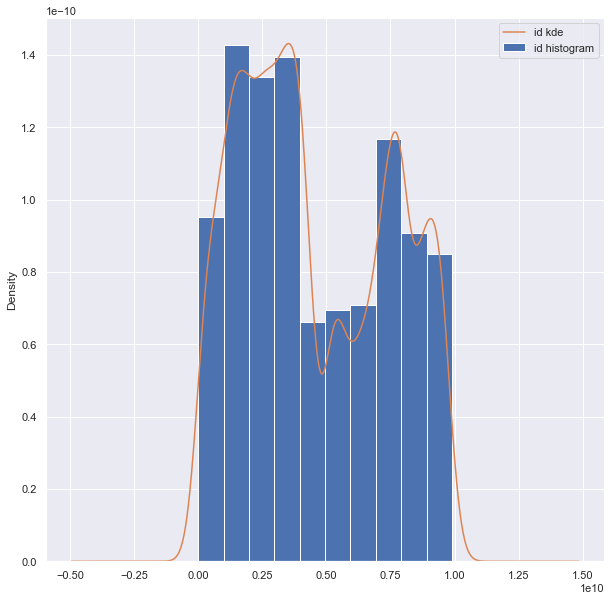

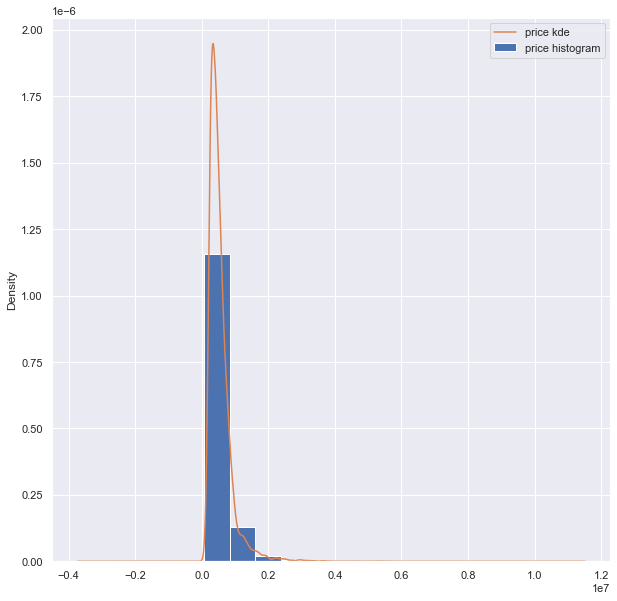

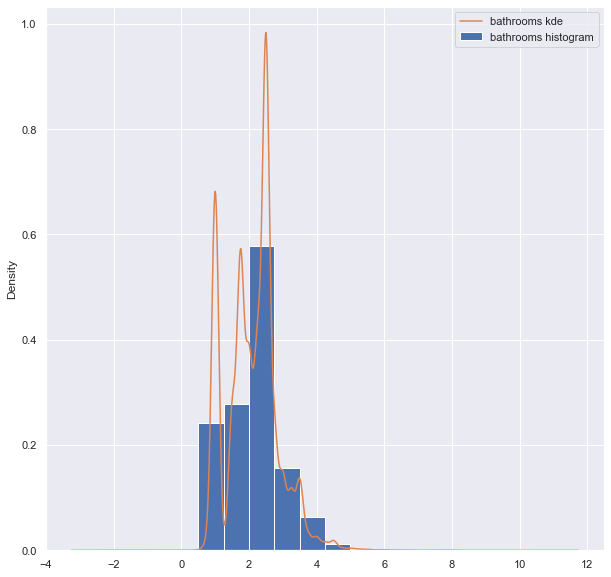

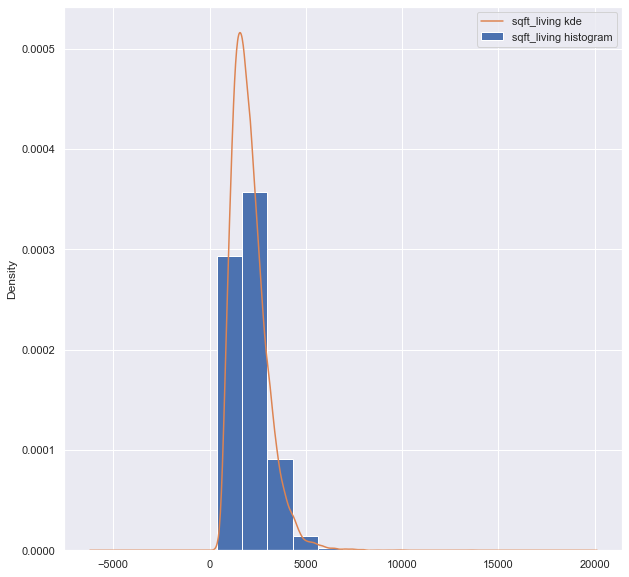

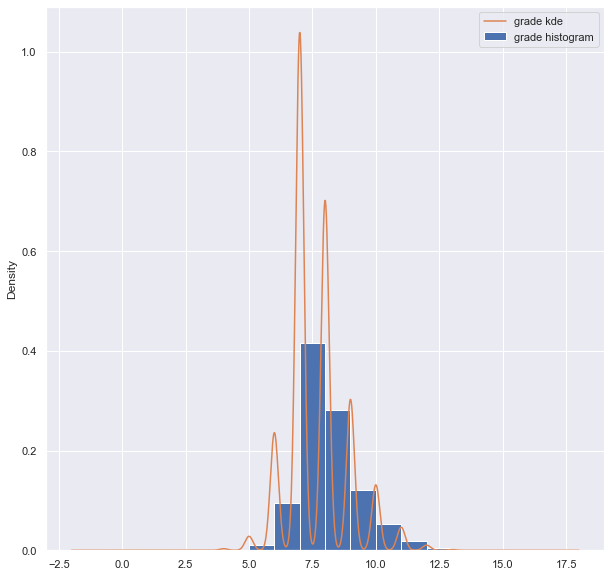

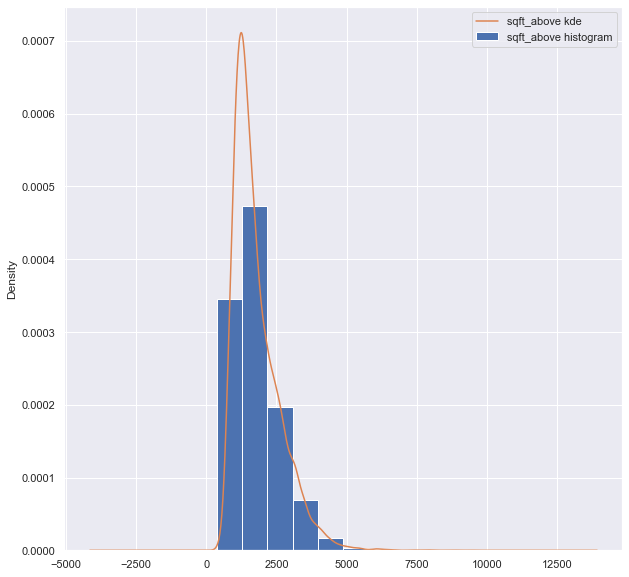

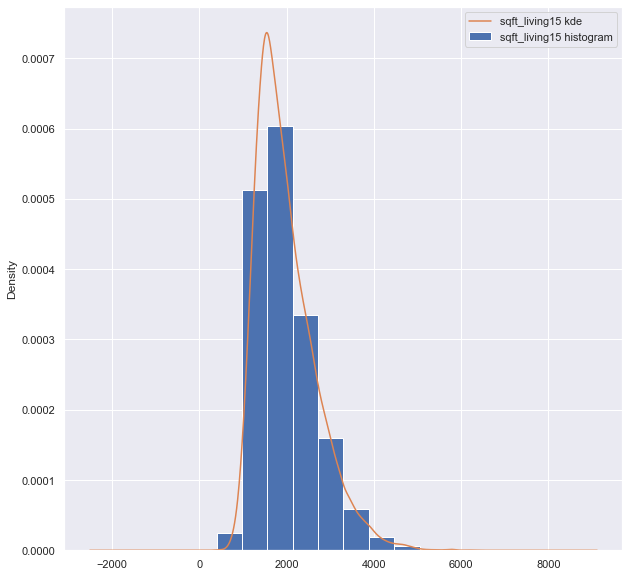

<Figure size 720x720 with 0 Axes>

In [83]:
#Plot histograms with kde overlay to check the normality of the predictors
for column in df_prep:
    df_prep[column].plot.hist(density=True, label = column+' histogram')
    df_prep[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()
    plt.tight_layout();

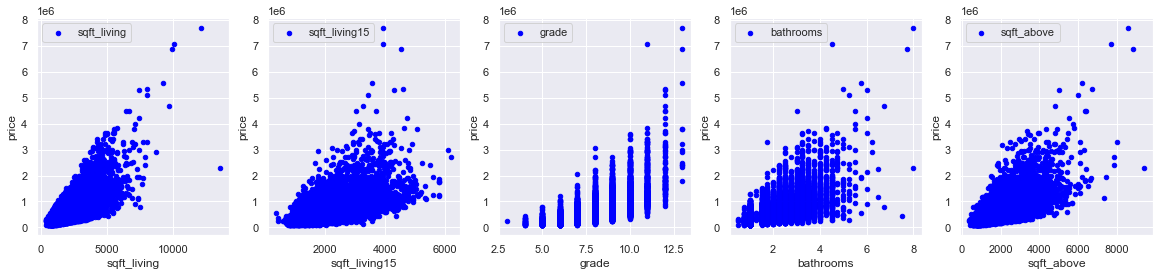

<Figure size 720x720 with 0 Axes>

In [84]:
#Scatter plots to check linearity
fig_1, axes = plt.subplots(figsize=(20,4), ncols=5)
for idx, channel in enumerate(['sqft_living', 'sqft_living15', 'grade', 'bathrooms', 'sqft_above']):
    df_prep.plot(kind='scatter', x=channel, y='price', ax=axes[idx], label=channel, color ='blue')
plt.legend()
plt.show()
plt.tight_layout();

From our histograms and scatter plots it looks like our features have roughly satisfy linearity with our dependent variable (price). Let's remove outliers and build a model on these features and evaluate it.

**Removing outliers**

In [30]:
df_prep.describe()

id         price     bathrooms   sqft_living         grade  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      2.115826   2080.321850      7.657915   
std    2.876736e+09  3.673681e+05      0.768984    918.106125      1.173200   
min    1.000102e+06  7.800000e+04      0.500000    370.000000      3.000000   
25%    2.123049e+09  3.220000e+05      1.750000   1430.000000      7.000000   
50%    3.904930e+09  4.500000e+05      2.250000   1910.000000      7.000000   
75%    7.308900e+09  6.450000e+05      2.500000   2550.000000      8.000000   
max    9.900000e+09  7.700000e+06      8.000000  13540.000000     13.000000   

         sqft_above  sqft_living15  
count  21597.000000   21597.000000  
mean    1788.596842    1986.620318  
std      827.759761     685.230472  
min      370.000000     399.000000  
25%     1190.000000    1490.000000  
50%     1560.000000    1840.000000  
75%     2210.000000    2360.000000  
max     9410.000000    6210.000000

In [31]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

index_list = []
for feature in ['price','bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']:
    index_list.extend(outliers(df_prep, feature))

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
df_cleaned = remove(df_prep, index_list)
df_cleaned.shape

(18945, 7)

In [32]:
df_prep.shape

(21597, 7)

**Model 1**
- This model has 5 significant features selected based on their linear relationship with price using histograms, scatter plots, correlation coeficient and stepwise selection process.

In [33]:
# Model 1 with selected significant features 
outcome = 'price'
predictors = df_cleaned.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_1 = ols(formula=formula, data=df_cleaned).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     1967.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:25:30   Log-Likelihood:            -2.5263e+05
No. Observations:               18945   AIC:                         5.053e+05
Df Residuals:                   18938   BIC:                         5.053e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.443e+05   1.09e+04    -31.501      0.000   -3.66e+05   -3.23e+05
id             1.378e-07   3.79e-07      0.364      0.716   -6.05e-07    8.81e-07
bathrooms     -2.345e+04   2359.255     -9.939      0.000   -2.81e+04   -1.88e+04
sqft_living     131.1138      3.270     40.091      0.000     124.704     137.524
grade          8.471e+04   1875.011     45.179      0.000     8.1e+04    8.84e+04
sqft_above      -67.0691      3.160    -21.222      0.000     -73.264     -60.875
sqft_living15    43.6192      3.007     14.508      0.000      37.726      49.512
==============================================================================
Omnibus:                     1176.762   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1443.371
Skew:                           0.617   Prob(JB):                         0.00
Kurtosis:                       3.555   Cond. No.                     5.54e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X_1 = df_cleaned.drop('price', axis=1)
y_1 = df_cleaned['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1,y_1, random_state=34)
model_1k = LinearRegression()
model_1k.fit(X1_train, y1_train)

y1_hat_train = model_1k.predict(X1_train)
y1_hat_test = model_1k.predict(X1_test)

from sklearn.metrics import mean_squared_error
train_mse_1 = mean_squared_error(y1_train, y1_hat_train)
test_mse_1 = mean_squared_error(y1_test, y1_hat_test)
RSME_1 = test_mse_1 - train_mse_1
print('Train Mean Squared Error:', train_mse_1)
print('Test Mean Squared Error:', test_mse_1)
print('RMSE:', RSME_1)

Train Mean Squared Error: 22374240198.606018
Test Mean Squared Error: 22469403868.464157
RMSE: 95163669.85813904


**Visualize the error term for variance and heteroscedasticity**

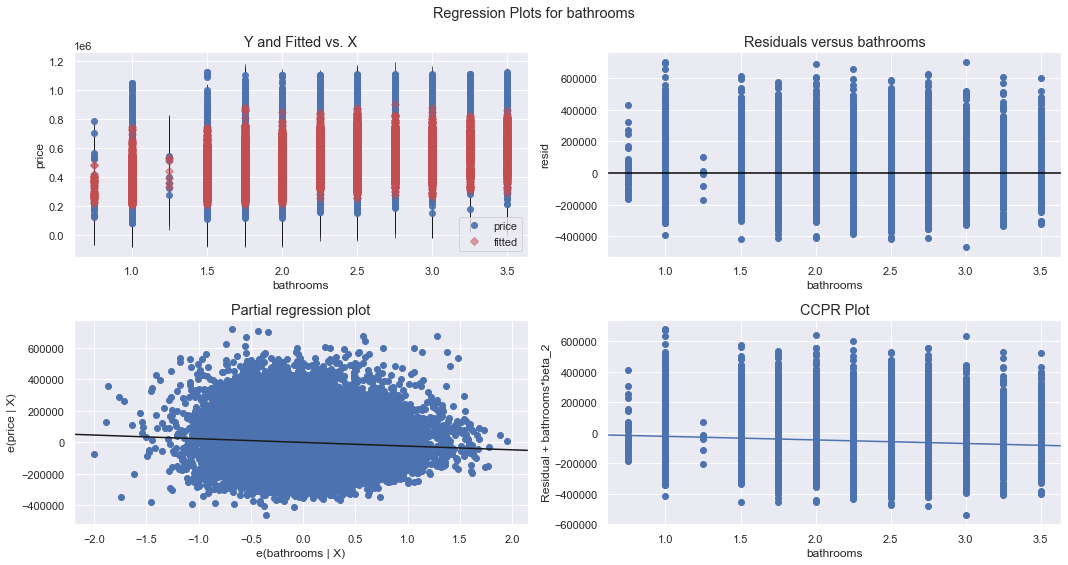

<Figure size 720x720 with 0 Axes>

In [85]:
#Bathrooms
fig_2 = plt.figure(figsize=(15,8))
fig_2 = sm.graphics.plot_regress_exog(model_1,'bathrooms',fig=fig_2)
plt.show()
plt.tight_layout();

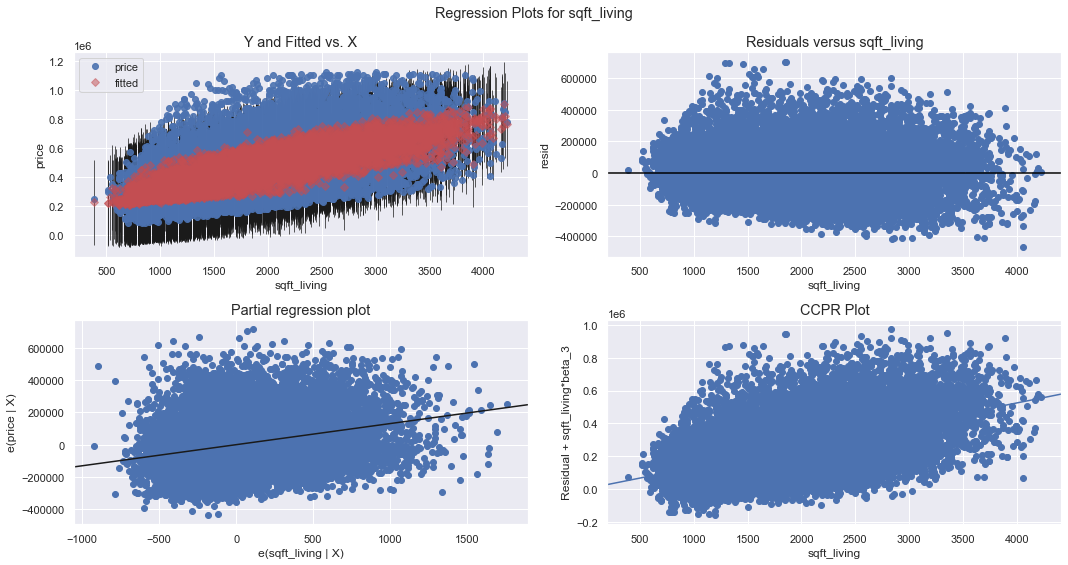

<Figure size 720x720 with 0 Axes>

In [86]:
#sqft_living
fig_3 = plt.figure(figsize=(15,8))
fig_3 = sm.graphics.plot_regress_exog(model_1,'sqft_living',fig=fig_3)
plt.show()
plt.tight_layout();

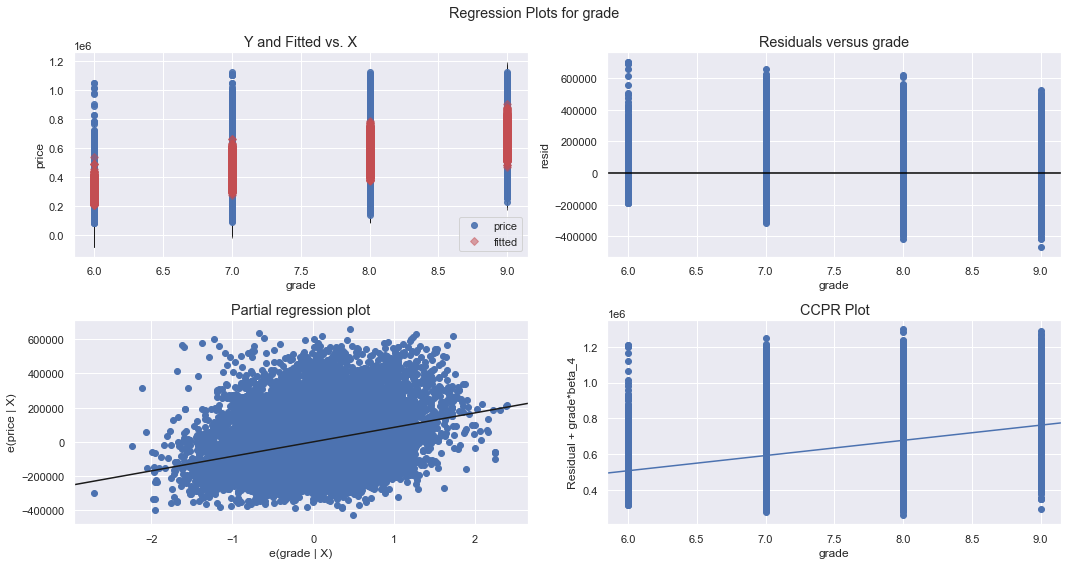

<Figure size 720x720 with 0 Axes>

In [87]:
#grade
fig_4 = plt.figure(figsize=(15,8))
fig_4 = sm.graphics.plot_regress_exog(model_1,'grade',fig=fig_4)
plt.show()
plt.tight_layout();

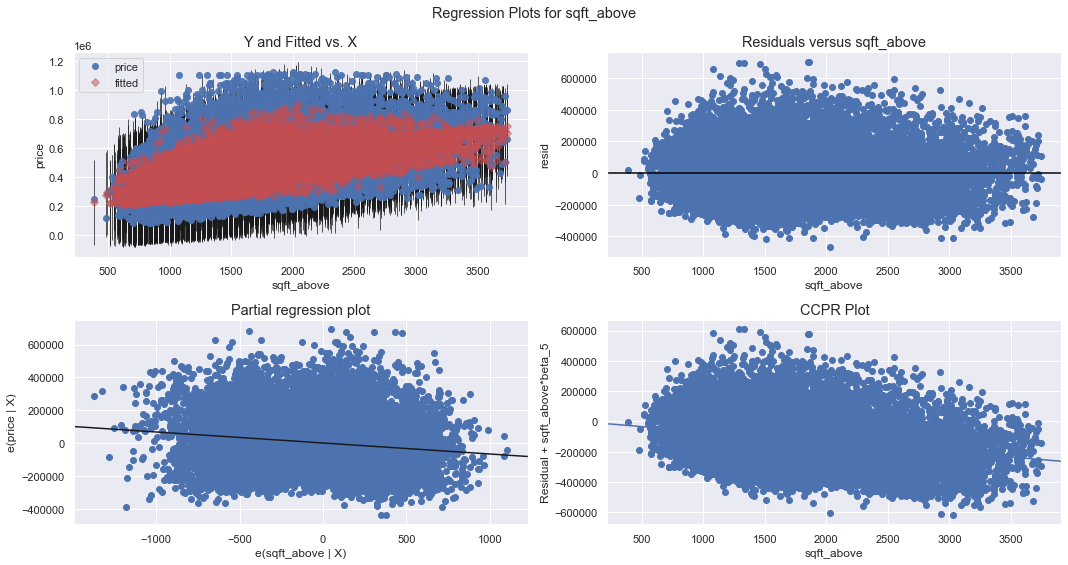

<Figure size 720x720 with 0 Axes>

In [88]:
#sqft_above
fig_5 = plt.figure(figsize=(15,8))
fig_5 = sm.graphics.plot_regress_exog(model_1,'sqft_above',fig=fig_5)
plt.show()
plt.tight_layout();

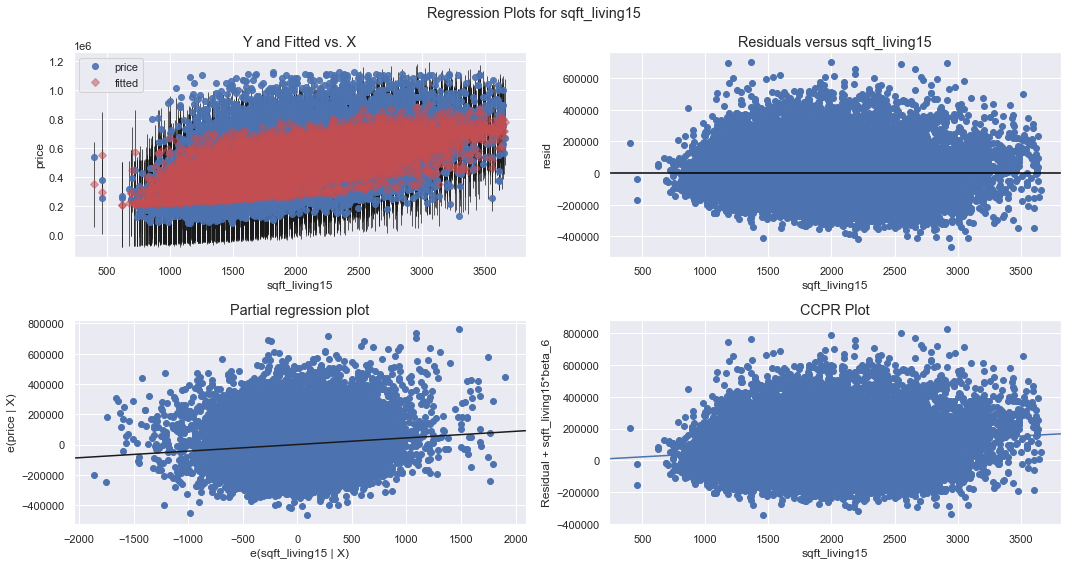

<Figure size 720x720 with 0 Axes>

In [89]:
#sqft_living15
fig_6 = plt.figure(figsize=(15,8))
fig_6 = sm.graphics.plot_regress_exog(model_1,'sqft_living15',fig=fig_6)
plt.show()
plt.tight_layout();

From residuals plot above, it looks like all our features have heteroscedasticity, violating the homoscedasticity assumption.

**Check the normality assumptions by creating a QQ-plot**

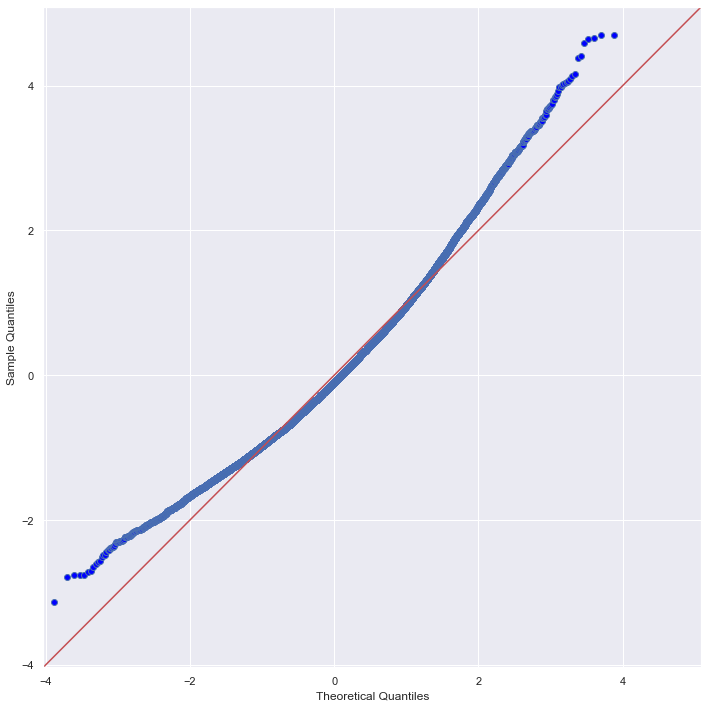

In [90]:
residuals = model_1.resid
fig_7 = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig_7.show()
plt.tight_layout();

QQ plot suggests violation of normality assumption.

Our adjusted R2 is 0.545 is not great meaning that the model can only explain about 55% of the prices in property sales. Our JB score is also very high suggesting our features has strong multicollinearity or other numerical problems. Let's check our features for outliers and multicollinearity. 

**Checking for multicollinearity**

In [41]:
df_cleaned.corr()

id     price  bathrooms  sqft_living     grade  \
id             1.000000  0.017558   0.032413     0.013558  0.039260   
price          0.017558  1.000000   0.372889     0.541732  0.543052   
bathrooms      0.032413  0.372889   1.000000     0.675731  0.582019   
sqft_living    0.013558  0.541732   0.675731     1.000000  0.629443   
grade          0.039260  0.543052   0.582019     0.629443  1.000000   
sqft_above     0.018072  0.417324   0.589943     0.808793  0.633770   
sqft_living15  0.011371  0.476125   0.487229     0.695846  0.597203   

               sqft_above  sqft_living15  
id               0.018072       0.011371  
price            0.417324       0.476125  
bathrooms        0.589943       0.487229  
sqft_living      0.808793       0.695846  
grade            0.633770       0.597203  
sqft_above       1.000000       0.659629  
sqft_living15    0.659629       1.000000

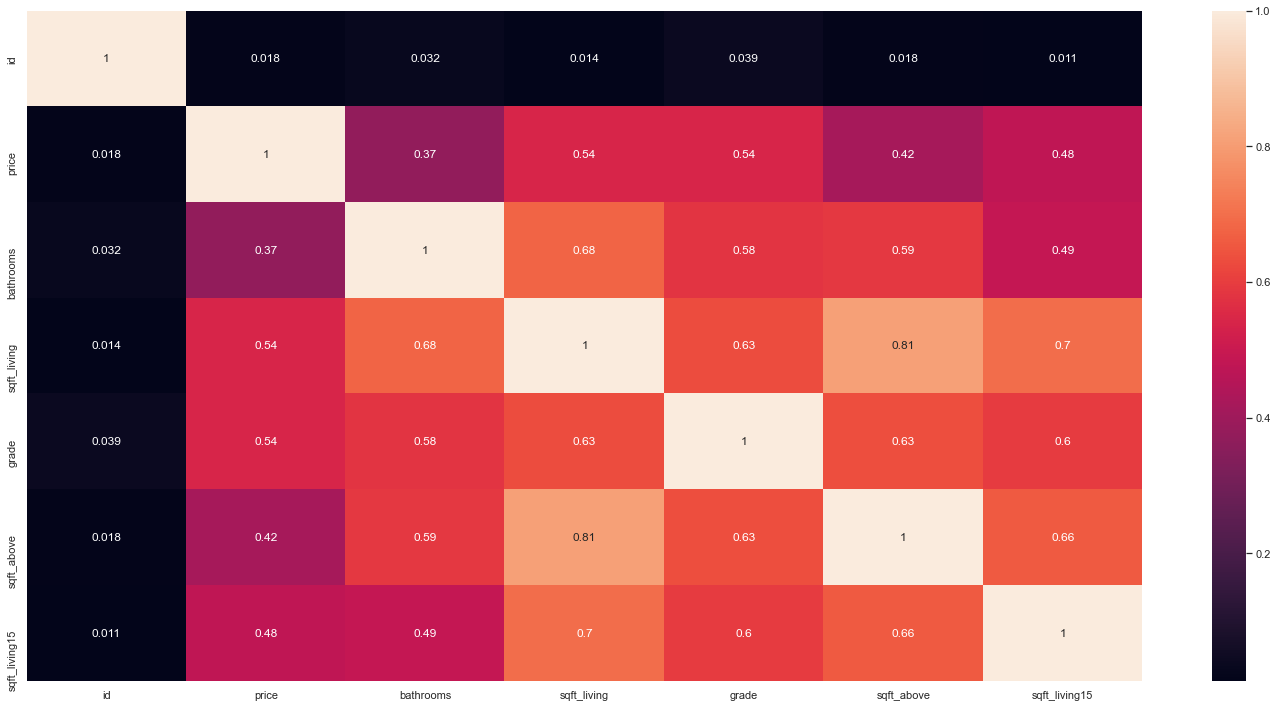

In [96]:
import seaborn as sns
df_cleaned.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=df_cleaned.corr(), annot=True)
plt.tight_layout();

In [43]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_1=df_cleaned.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_1['pairs'] = list(zip(df_1.level_0, df_1.level_1))

# set index to pairs
df_1.set_index(['pairs'], inplace = True)

#d rop level columns
df_1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_1.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.

df_1.drop_duplicates(inplace=True)
df_1[(df_1.cc>.75) & (df_1.cc <1)]

cc
pairs                              
(sqft_living, sqft_above)  0.808793

In [44]:
#removing sqft_above to remove multicollinearity
non_colin_df = df_cleaned.drop(['sqft_above'], axis=1)
non_colin_df.columns

Index(['id', 'price', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15'], dtype='object')

**Model 2**
- This model is built on 4 significant features with multicollinearity removed. 

In [45]:
outcome = 'price'
predictors = non_colin_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_2 = ols(formula=formula, data=non_colin_df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     2218.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:25:45   Log-Likelihood:            -2.5285e+05
No. Observations:               18945   AIC:                         5.057e+05
Df Residuals:                   18939   BIC:                         5.058e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.994e+05   1.08e+04    -27.597      0.000   -3.21e+05   -2.78e+05
id              1.21e-07   3.84e-07      0.315      0.752   -6.31e-07    8.73e-07
bathrooms     -2.526e+04   2385.513    -10.590      0.000   -2.99e+04   -2.06e+04
sqft_living      94.0833      2.799     33.618      0.000      88.598      99.569
grade          7.657e+04   1856.948     41.232      0.000    7.29e+04    8.02e+04
sqft_living15    33.0350      3.000     11.012      0.000      27.155      38.915
==============================================================================
Omnibus:                     1209.708   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1473.286
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                       3.493   Cond. No.                     5.43e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X_2 = non_colin_df.drop('price', axis=1)
y_2 = non_colin_df['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2,y_2, random_state=3)
model_2k = LinearRegression()
model_2k.fit(X2_train, y2_train)

y2_hat_train = model_2k.predict(X2_train)
y2_hat_test = model_2k.predict(X2_test)

from sklearn.metrics import mean_squared_error
train_mse_2 = mean_squared_error(y2_train, y2_hat_train)
test_mse_2 = mean_squared_error(y2_test, y2_hat_test)
RSME_2 = test_mse_2 - train_mse_2
print('Train Mean Squared Error:', train_mse_2)
print('Test Mean Squared Error:', test_mse_2)
print('RMSE:', RSME_2)

Train Mean Squared Error: 22914369057.987286
Test Mean Squared Error: 22976875834.85237
RMSE: 62506776.8650856


**Visualize the error term for variance and heteroscedasticity**

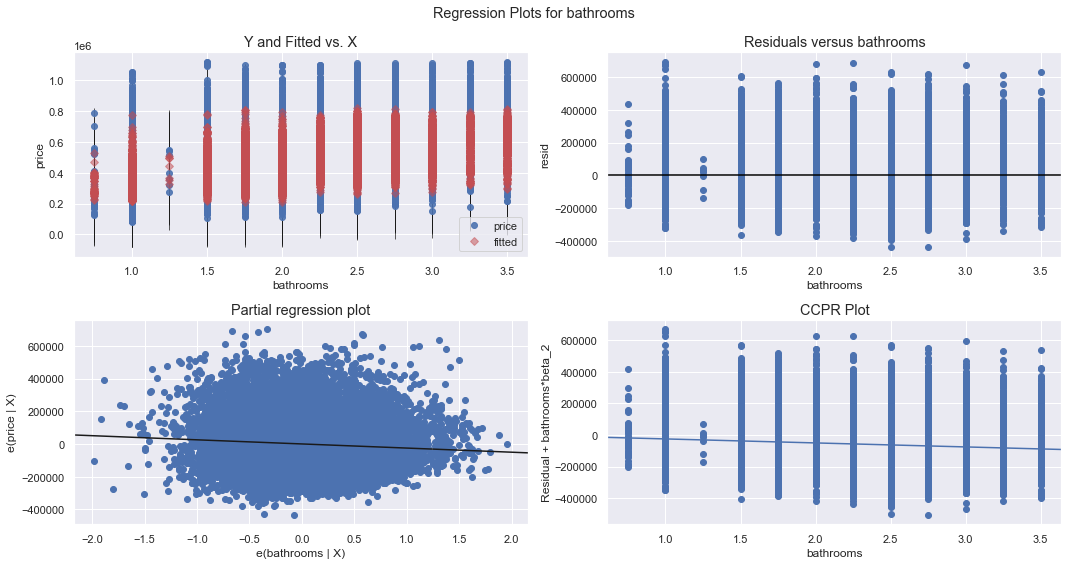

<Figure size 720x720 with 0 Axes>

In [97]:
#Bathrooms
fig_8 = plt.figure(figsize=(15,8))
fig_8 = sm.graphics.plot_regress_exog( model_2,'bathrooms',fig=fig_8)
plt.show()
plt.tight_layout();

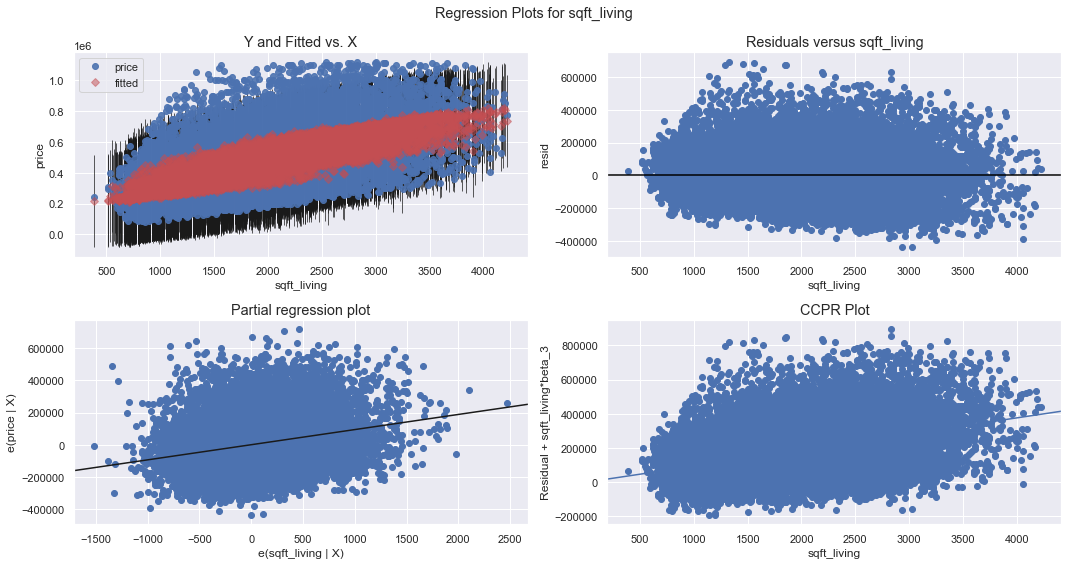

<Figure size 720x720 with 0 Axes>

In [98]:
#sqft_living
fig_9 = plt.figure(figsize=(15,8))
fig_9 = sm.graphics.plot_regress_exog( model_2,'sqft_living',fig=fig_9)
plt.show()
plt.tight_layout();

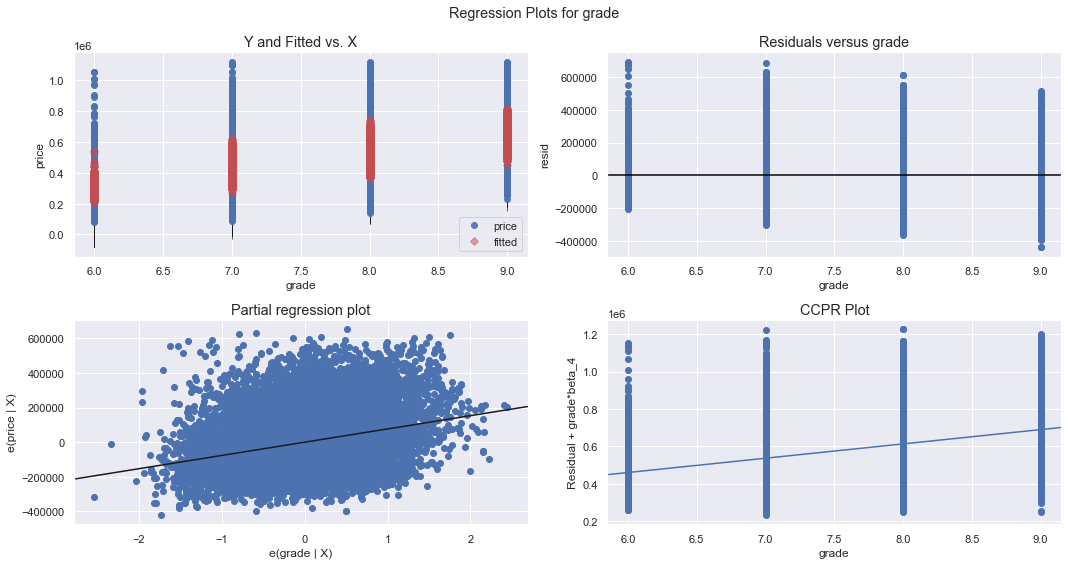

<Figure size 720x720 with 0 Axes>

In [99]:
#grade
fig_10 = plt.figure(figsize=(15,8))
fig_10 = sm.graphics.plot_regress_exog( model_2,'grade',fig=fig_10)
plt.show()
plt.tight_layout();

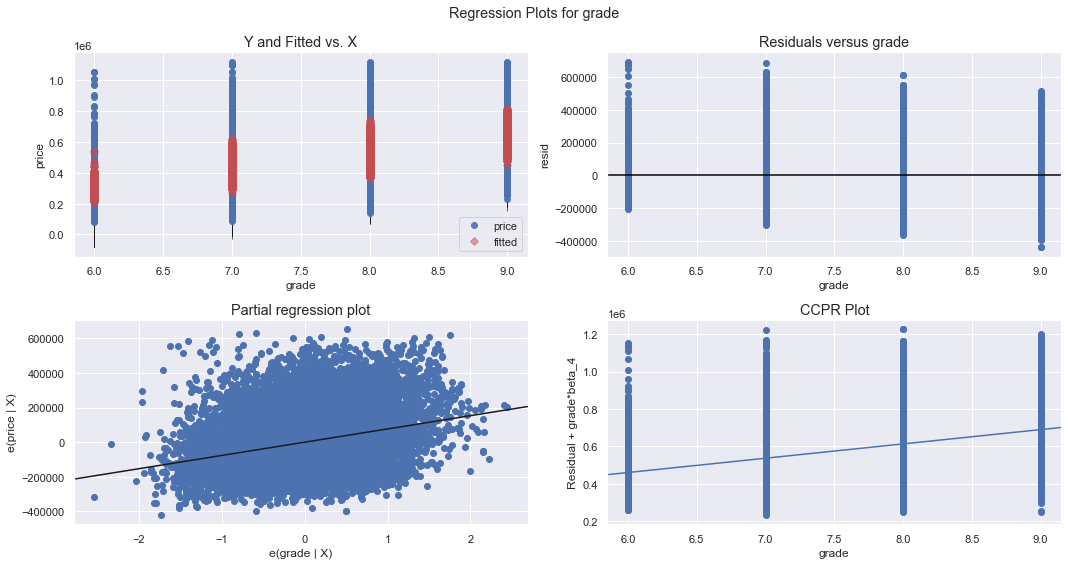

<Figure size 720x720 with 0 Axes>

In [100]:
#sqft_living15
fig_11 = plt.figure(figsize=(15,8))
fig_11 = sm.graphics.plot_regress_exog( model_2,'grade',fig=fig_11)
plt.show()
plt.tight_layout();

**Check the normality assumptions by creating a QQ-plot**

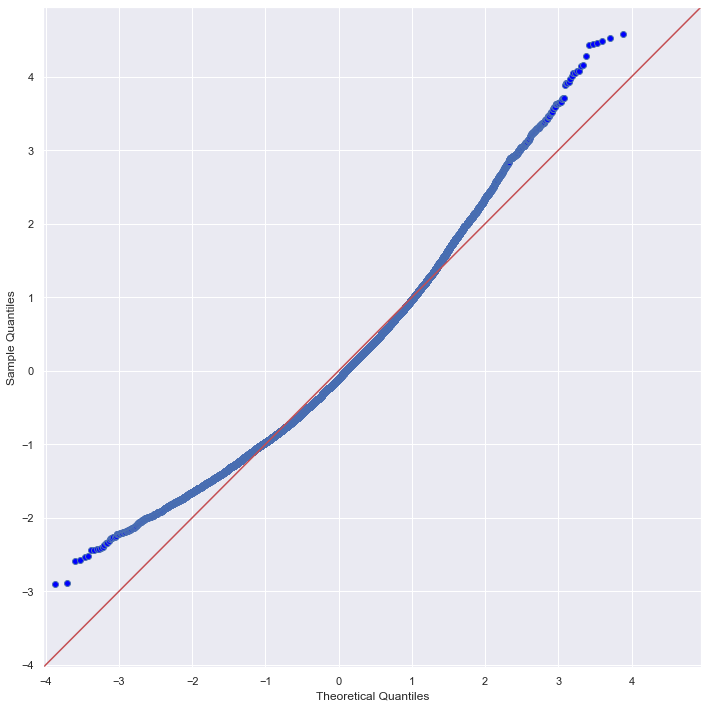

In [101]:
resid = model_2.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
plt.tight_layout();

Looking at this model 2, our adjusted R2 value has reduced. Our RSME is very high and test mean error is higher than train mean error meaning our model is overfitting. However, we can see that our model all have improved in their linearity and homoscedasticity. Let's transform our features to see if we can improve our model.

**Log Transformation**

- Before log transformation 

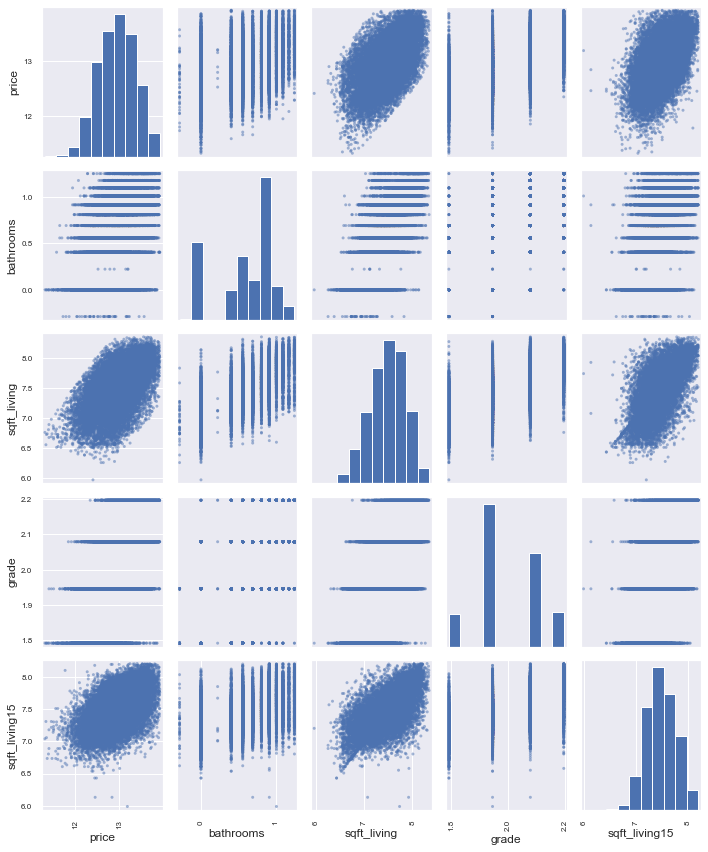

In [103]:
features = non_colin_df.drop(['id'], axis=1)
pd.plotting.scatter_matrix(features, figsize=(10,12))
plt.tight_layout();

- After log transformation
- Bathrooms is not being transformed because it look pretty normal from our residual plots

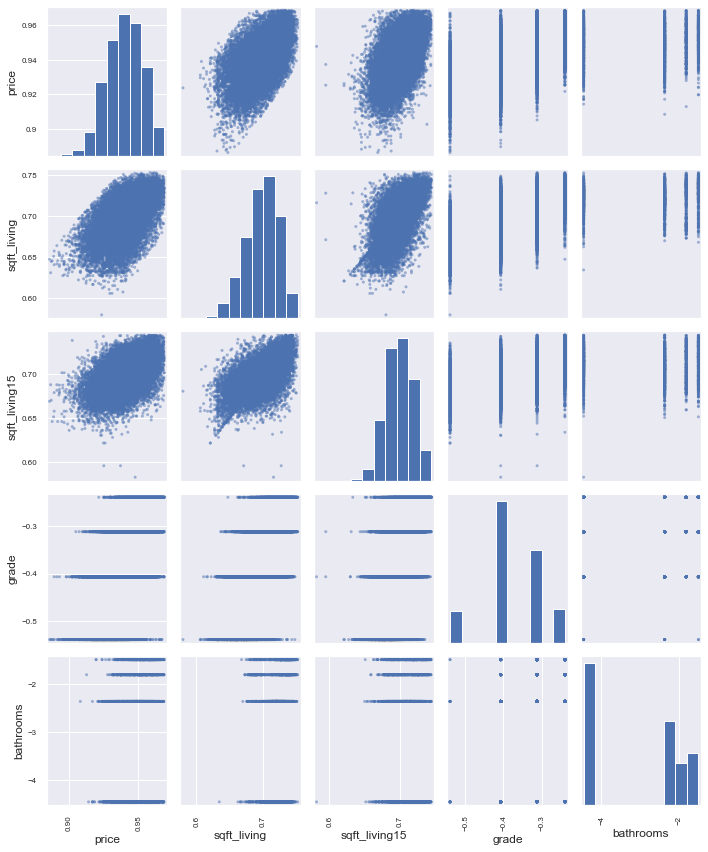

In [105]:
non_normal = ['price','sqft_living', 'sqft_living15', 'grade', 'bathrooms']
for feat in non_normal:
    non_colin_df[feat] = non_colin_df[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(non_colin_df[non_normal], figsize=(10,12))
plt.tight_layout();

**Model 3**
- This model is built with features after log transformation 

In [54]:
outcome = 'price'
predictors = non_colin_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_3 = ols(formula=formula, data=non_colin_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     2240.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:26:06   Log-Likelihood:                -6086.0
No. Observations:               18945   AIC:                         1.218e+04
Df Residuals:                   18939   BIC:                         1.223e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.5869      0.081     81.757      0.000       6.429       6.745
id             8.584e-13   8.45e-13      1.016      0.310   -7.98e-13    2.51e-12
bathrooms        -0.0894      0.010     -9.237      0.000      -0.108      -0.070
sqft_living       0.3525      0.011     30.686      0.000       0.330       0.375
grade             1.2807      0.030     42.343      0.000       1.221       1.340
sqft_living15     0.1627      0.012     13.366      0.000       0.139       0.187
==============================================================================
Omnibus:                      186.161   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.759
Skew:                          -0.075   Prob(JB):                     1.81e-28
Kurtosis:                       2.627   Cond. No.                     1.83e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
X_3 = non_colin_df.drop('price', axis=1)
y_3 = non_colin_df['price']
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3,y_3, random_state=22)
model_3k = LinearRegression()
model_3k.fit(X3_train, y3_train)

y3_hat_train = model_3k.predict(X2_train)
y3_hat_test = model_3k.predict(X2_test)

from sklearn.metrics import mean_squared_error
train_mse_3 = mean_squared_error(y3_train, y3_hat_train)
test_mse_3 = mean_squared_error(y3_test, y3_hat_test)
RSME_3 = test_mse_3 - train_mse_3
print('Train Mean Squared Error:', train_mse_3)
print('Test Mean Squared Error:', test_mse_3)
print('RMSE:', RSME_3)

Train Mean Squared Error: 986637.8641227975
Test Mean Squared Error: 987030.6521713876
RMSE: 392.7880485900678


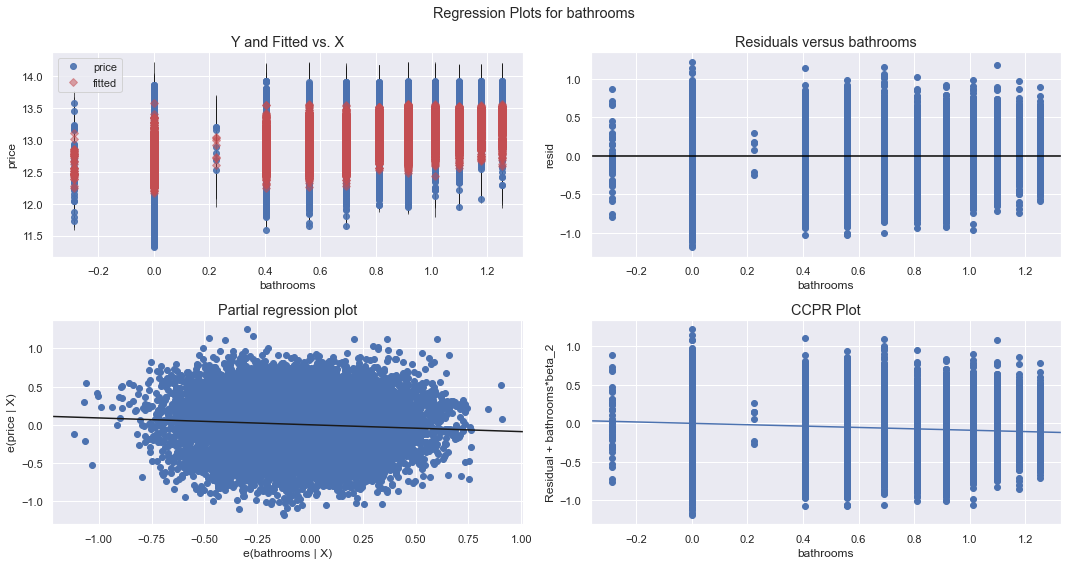

<Figure size 720x720 with 0 Axes>

In [106]:
fig_12 = plt.figure(figsize=(15,8))
fig_12 = sm.graphics.plot_regress_exog( model_3,'bathrooms',fig=fig_12)
plt.show()
plt.tight_layout();

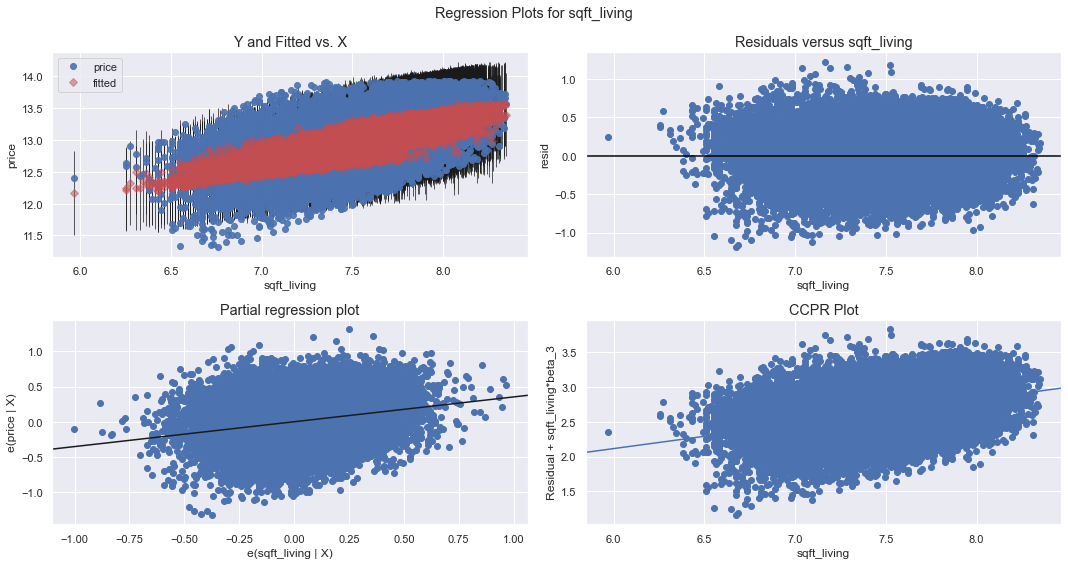

<Figure size 720x720 with 0 Axes>

In [107]:
fig_13 = plt.figure(figsize=(15,8))
fig_13 = sm.graphics.plot_regress_exog( model_3,'sqft_living',fig=fig_13)
plt.show()
plt.tight_layout();

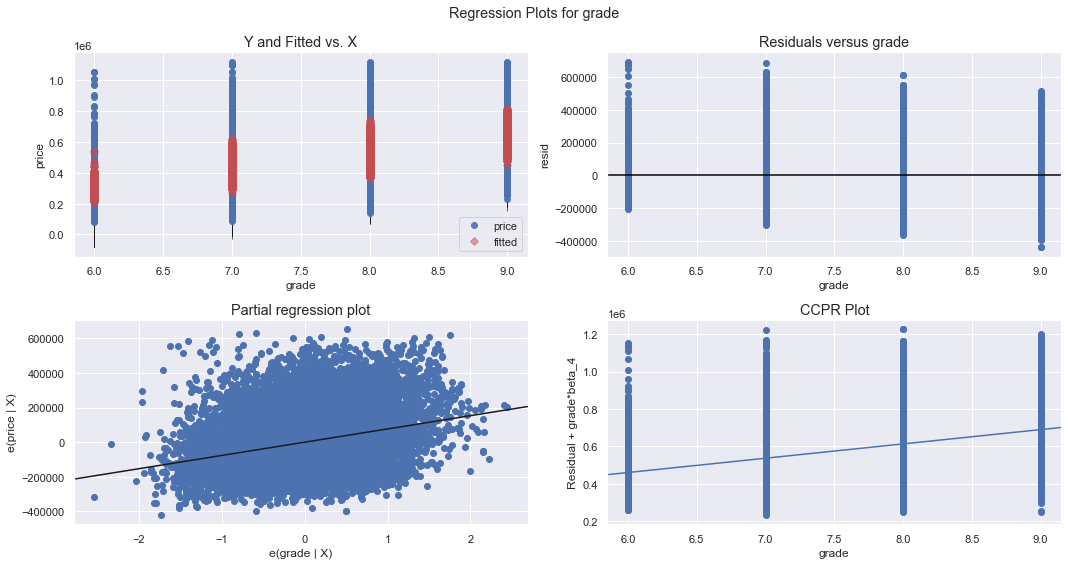

<Figure size 720x720 with 0 Axes>

In [108]:
fig_14 = plt.figure(figsize=(15,8))
fig_14 = sm.graphics.plot_regress_exog( model_2,'grade',fig=fig_14)
plt.show()
plt.tight_layout();

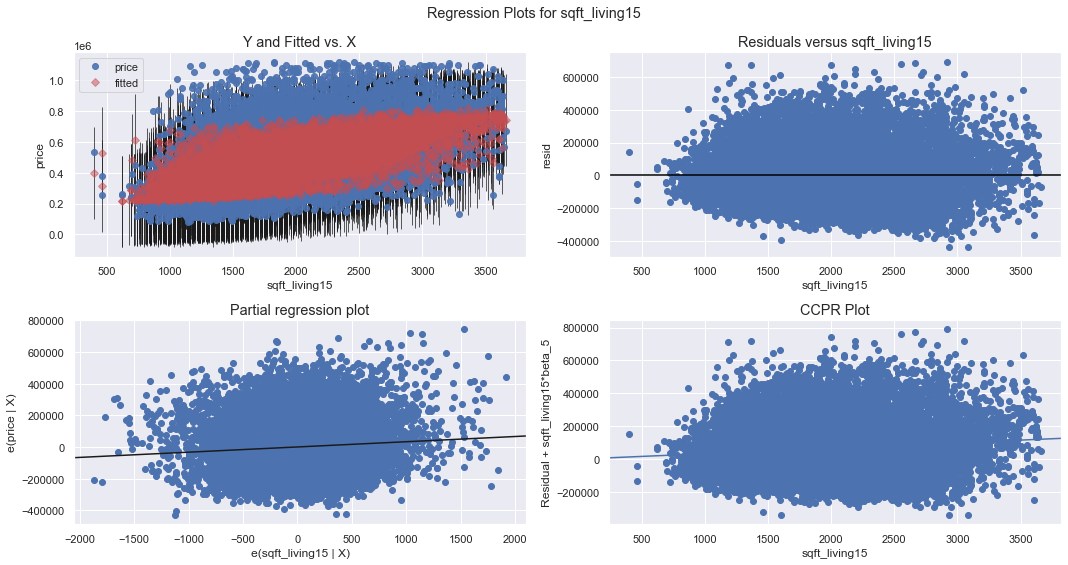

<Figure size 720x720 with 0 Axes>

In [109]:
fig_15 = plt.figure(figsize=(15,8))
fig_15 = sm.graphics.plot_regress_exog( model_2,'sqft_living15',fig=fig_15)
plt.show()
plt.tight_layout();

**Check the normality assumptions by creating a QQ-plot**

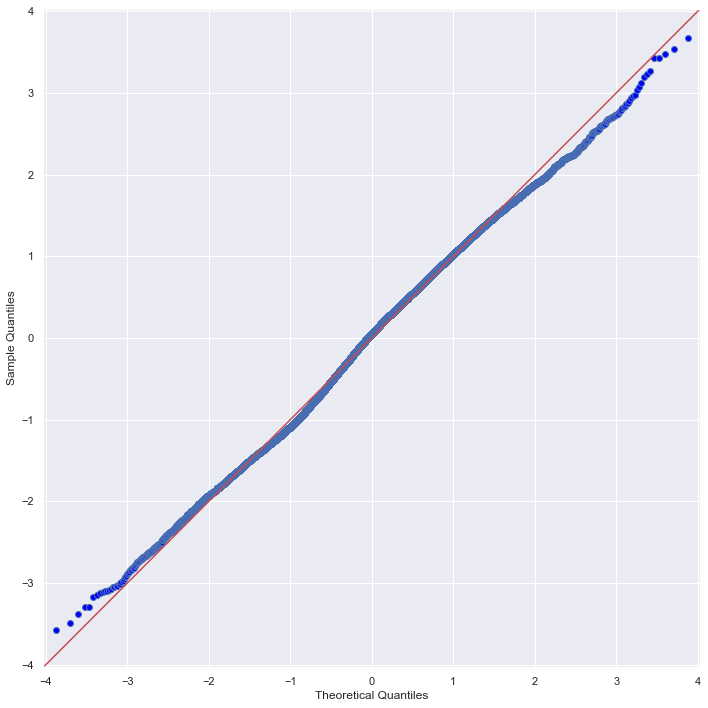

In [111]:
resid = model_3.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
plt.tight_layout();

Log transforming our model makes our model more normally disctributed. RMSE now reduce to 392.79.

**Standard Scaling**

In [61]:
sqft_living_log = non_colin_df['sqft_living']
sqft_living15_log = non_colin_df['sqft_living15']
bathrooms_log = non_colin_df['bathrooms']
bathrooms_log = non_colin_df['grade']

scaled_sqft_living = (sqft_living_log - np.mean(sqft_living_log)) / np.sqrt(np.var(sqft_living_log))
scaled_sqft_living15 = (sqft_living15_log - np.mean(sqft_living15_log)) / np.sqrt(np.var(sqft_living15_log))
scaled_bathrooms = (bathrooms_log - np.mean(bathrooms_log)) / np.sqrt(np.var(bathrooms_log))
scaled_grade = (bathrooms_log - np.mean(bathrooms_log)) / np.sqrt(np.var(bathrooms_log))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['sqft_living_sc'] = scaled_sqft_living
data_cont_scaled['sqft_living15_sc'] = scaled_sqft_living15
data_cont_scaled['bathroom_sc'] = scaled_bathrooms
data_cont_scaled['grade_sc'] = scaled_grade

price_df = non_colin_df['price']

final_df = pd.concat((price_df,data_cont_scaled), axis=1)
final_df

price  sqft_living_sc  sqft_living15_sc  bathroom_sc  grade_sc
0      12.309982       -1.128719         -1.006443    -0.477879 -0.477879
1      13.195614        1.019843         -0.192494    -0.477879 -0.477879
2      12.100712       -2.307017          1.476743    -1.863078 -1.863078
3      13.311329        0.271919         -0.954479    -0.477879 -0.477879
4      13.142166       -0.153577          0.028683     0.722034  0.722034
...          ...             ...               ...          ...       ...
21592  12.793859       -0.411733         -0.541354     0.722034  0.722034
21593  12.899220        0.725438          0.086660     0.722034  0.722034
21594  12.904459       -1.530922         -1.963527    -0.477879 -0.477879
21595  12.899220       -0.288250         -0.827840     0.722034  0.722034
21596  12.691580       -1.530922         -1.963527    -0.477879 -0.477879

[18945 rows x 5 columns]

**Final model**
- This model has all continuous variables log transformed and standardised
- This model treating bathrooms and grade as continuous variables

In [62]:
outcome = 'price'
predictors = final_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_4 = ols(formula=formula, data=final_df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     3689.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:26:17   Log-Likelihood:                -6128.9
No. Observations:               18945   AIC:                         1.227e+04
Df Residuals:                   18941   BIC:                         1.230e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.9502      0.002   5329.884      0.000      12.945      12.955
sqft_living_sc       0.1088      0.004     29.947      0.000       0.102       0.116
sqft_living15_sc     0.0477      0.003     13.722      0.000       0.041       0.054
bathroom_sc          0.0672      0.002     41.346      0.000       0.064       0.070
grade_sc             0.0672      0.002     41.346      0.000       0.064       0.070
==============================================================================
Omnibus:                      210.682   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.179
Skew:                          -0.055   Prob(JB):                     2.69e-30
Kurtosis:                       2.600   Cond. No.                     1.75e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
X_4 = final_df.drop('price', axis=1)
y_4 = final_df['price']
X4_train, X4_test, y4_train, y4_test = train_test_split(X_4,y_4, random_state=68)
model_4k = LinearRegression()
model_4k.fit(X4_train, y4_train)

y4_hat_train = model_4k.predict(X4_train)
y4_hat_test = model_4k.predict(X4_test)

from sklearn.metrics import mean_squared_error
train_mse_4 = mean_squared_error(y4_train, y4_hat_train)
test_mse_4 = mean_squared_error(y4_test, y4_hat_test)
RSME_4 = test_mse_4 - train_mse_4
print('Train Mean Squared Error:', train_mse_4)
print('Test Mean Squared Error:', test_mse_4)
print('RMSE:', RSME_4)

Train Mean Squared Error: 0.11151792401428043
Test Mean Squared Error: 0.11273874336082608
RMSE: 0.0012208193465456513


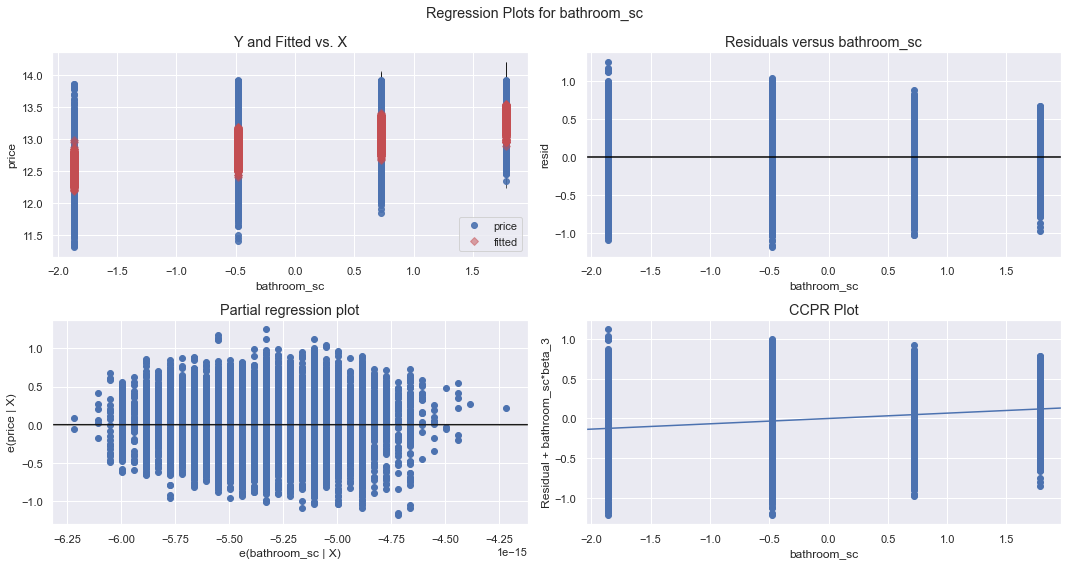

<Figure size 720x720 with 0 Axes>

In [112]:
#bathrooms
fig_16 = plt.figure(figsize=(15,8))
fig_16 = sm.graphics.plot_regress_exog( model_4,'bathroom_sc',fig=fig_16)
plt.show()
plt.tight_layout();

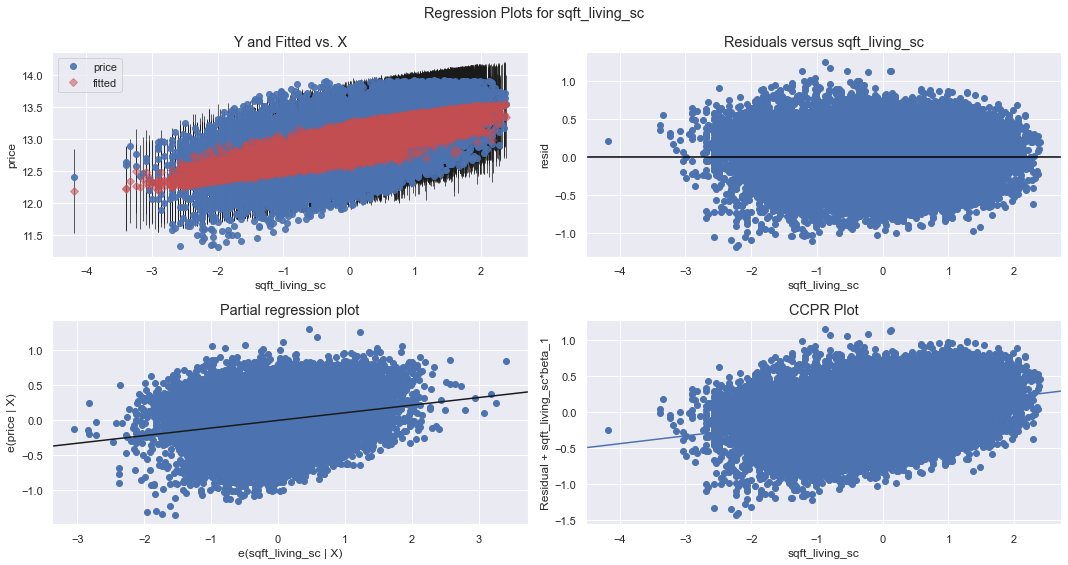

<Figure size 720x720 with 0 Axes>

In [113]:
#sqft_living
fig_17 = plt.figure(figsize=(15,8))
fig_17 = sm.graphics.plot_regress_exog( model_4,'sqft_living_sc',fig=fig_17)
plt.show()
plt.tight_layout();

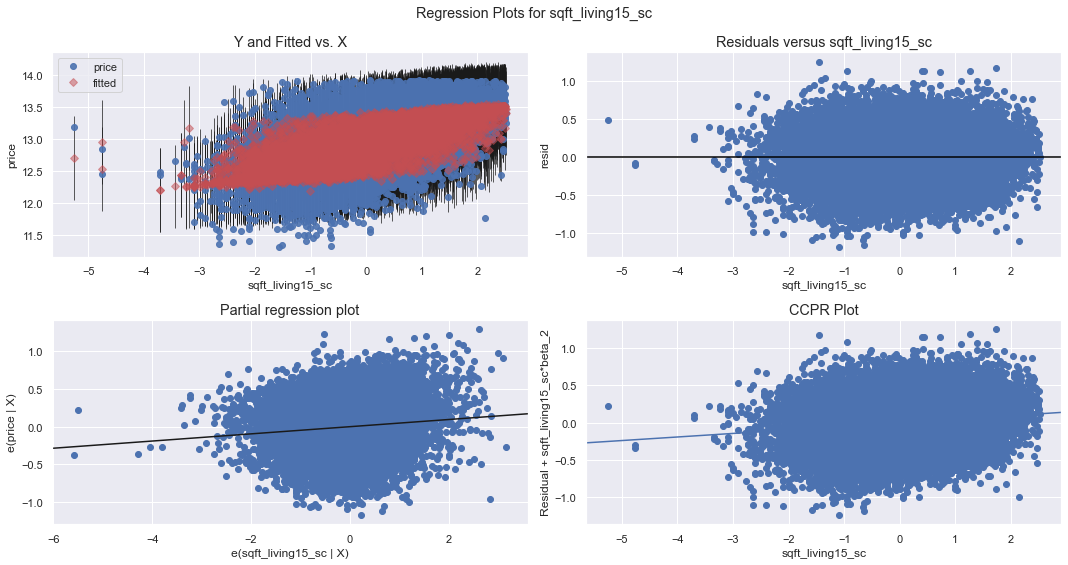

<Figure size 720x720 with 0 Axes>

In [114]:
#sqft_living15
fig_18 = plt.figure(figsize=(15,8))
fig_18 = sm.graphics.plot_regress_exog( model_4,'sqft_living15_sc',fig=fig_18)
plt.show()
plt.tight_layout();

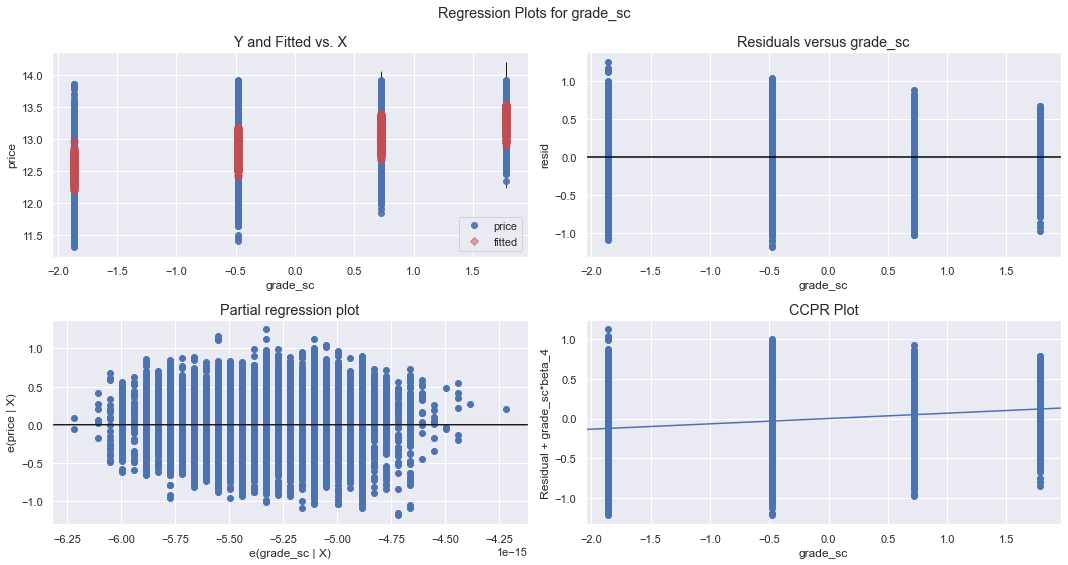

<Figure size 720x720 with 0 Axes>

In [115]:
#grade
fig_19 = plt.figure(figsize=(15,8))
fig_19 = sm.graphics.plot_regress_exog( model_4,'grade_sc',fig=fig_19)
plt.show()
plt.tight_layout();

**Check the normality assumptions by creating a QQ-plot**

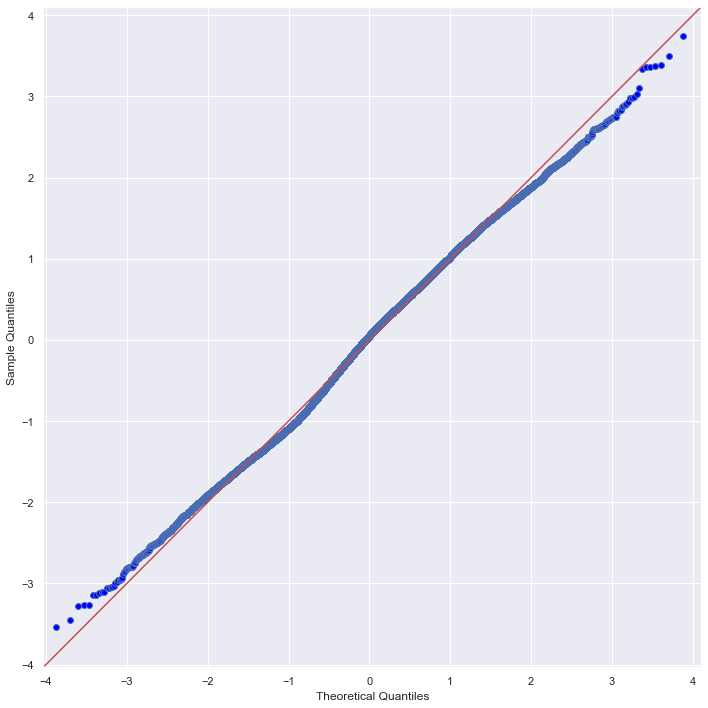

In [117]:
resid = model_4.resid
sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
plt.tight_layout();

**Cross validation**

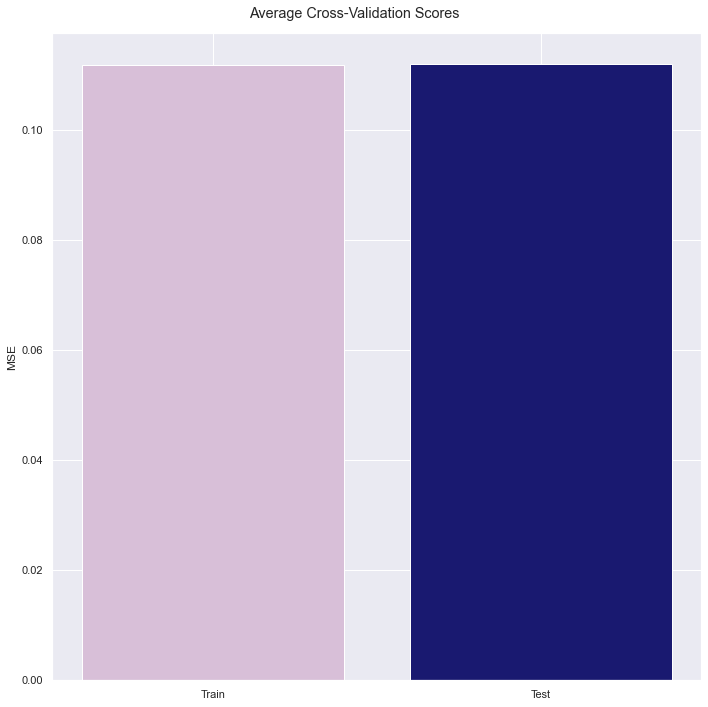

In [126]:
from sklearn.model_selection import cross_validate
linreg = LinearRegression()

X = final_df.drop('price', axis=1)
y = final_df['price']

cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

labels = ["Train", "Test"]
color = ['thistle', 'midnightblue']

fig_20, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color = color)
ax.set_ylabel("MSE")
fig_20.suptitle("Average Cross-Validation Scores")
plt.tight_layout();

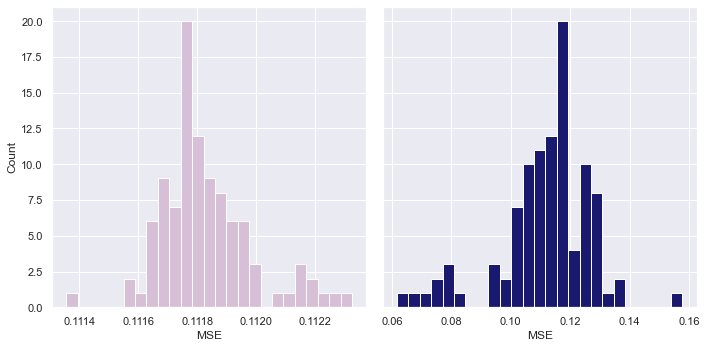

In [127]:
cross_val_results = cross_validate(linreg, X, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig_21, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color='thistle')
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color='midnightblue')
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend()
plt.tight_layout();

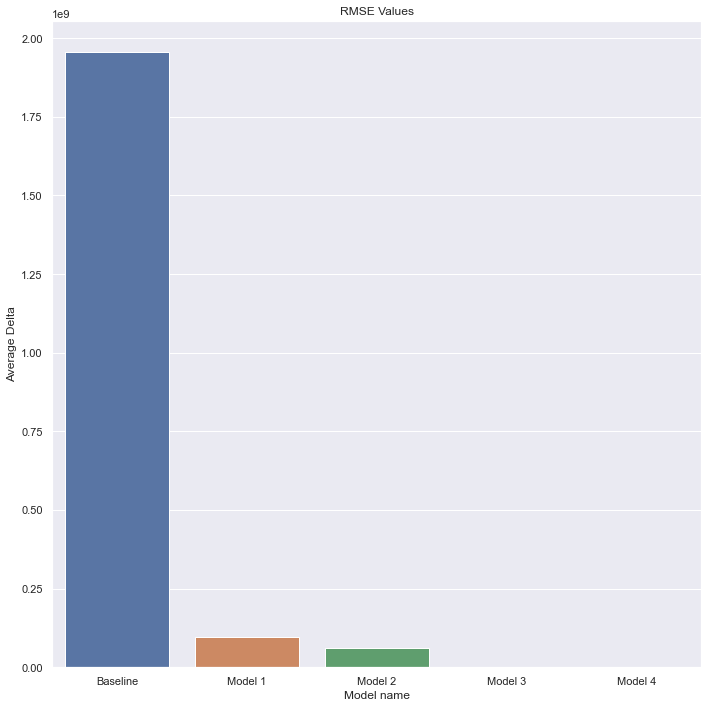

In [129]:
RMSE_values = [RSME_0, RSME_1, RSME_2, RSME_3, RSME_4 ]
baseline_names =['Baseline', 'Model 1', 'Model 2', 'Model 3', 'Model 4']


plt.bar(baseline_names, height=RMSE_values)
plt.title('RMSE Values')
plt.xlabel('Model name')
plt.ylabel('Average Delta');

sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x=baseline_names, y=RMSE_values).set(title='RMSE Values', xlabel='Model name', ylabel='Average Delta')
plt.tight_layout();

## Evaluation

The final model is able to produce almost zero residual both in the test and train group which means that within linear regression this model is very accurate. With a neglegible RMSE value close to 0, this model does not seem to be underfit or overfit. It has reasonable ability to generalise beyond the dataset. However adjusted R2 value is only 0.369 which means that this model can only explain 36.9% changes in the dependent variable i.e the features in this multilinear regression model can only explain 36.9% of the property sale price which is low. I am confident that this model can accurate predict property value based on RSME results from cross validation however the model has low inference abilty given the low adjusted R2 value. Therefore, this model can is useful in accurately predicting the property value but it will fail to accurately explain how each feature of the property will affect property value.   

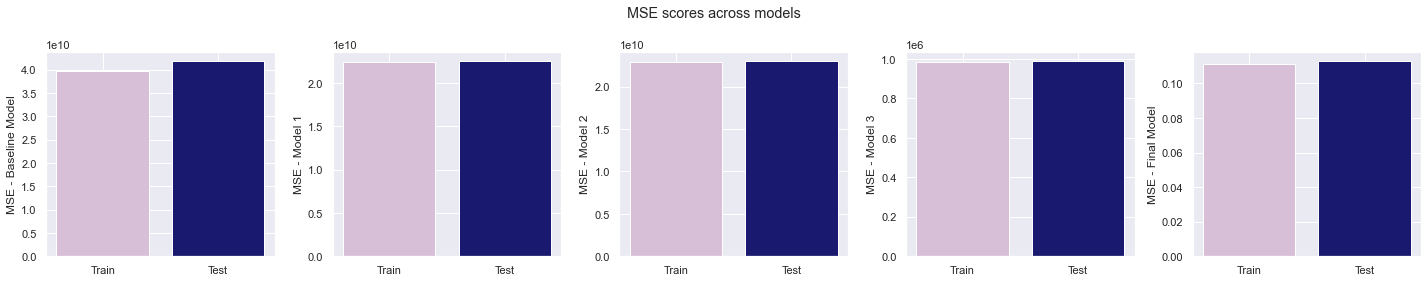

In [130]:
fig_22, axes = plt.subplots(figsize = (20,4), ncols=5)

labels = ["Train", "Test"]
colors = ["thistle", "midnightblue"]

axes[0].bar(labels, [train_mse_0, test_mse_0], color=colors)
axes[0].set_ylabel("MSE - Baseline Model")

axes[1].bar(labels, [train_mse_1, test_mse_1], color=colors)
axes[1].set_ylabel("MSE - Model 1")

axes[2].bar(labels, [train_mse_2, test_mse_2], color=colors)
axes[2].set_ylabel("MSE - Model 2")

axes[3].bar(labels, [train_mse_3, test_mse_3], color=colors)
axes[3].set_ylabel("MSE - Model 3")

axes[4].bar(labels, [train_mse_4, test_mse_4], color=colors)
axes[4].set_ylabel("MSE - Final Model")

fig_22.suptitle("MSE scores across models")
plt.tight_layout();

## Conclusions
From our final model summary, the estimated value of the coefficient indicates how much the model multiplies this independent value. sqft_living (footage of the home) has the highest estimated value of coefficient out of our 4 significant features meaning this feature adds the most value to the property. Doing a house extension might be a good idea to increase property value. However, during data exploration, renovations does not show a strong postive linear relationship with prices yet baseline model shows that it is a sigficant feature with p-value <0.05 and a coefficient of determination of 4.836e+04. In conclusion, renovation does add value to properties. The model also reveals that the size of houses in the neighbourhood does have a positive impact on property prices.

**Limitations:**

- Perhaps linear regression is not suitable for this data set. Based on RSME results from cross validation, it looks like the model can predict the property value accurately however our adjusted R2 was low, the model requires more data and a more suitable regression model to be able to give clients advised on how each feature add value to the property.

- In this dataset, our categorical features are fortunately are easily converted to numerical values without using one hot encoding. Grade and bathrooms feature could've been converted to dummies however they were already in numerical values. 